## Importazione librerie e caricamento dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df_cyclists = pd.read_csv('df_cyclists_no_missing.csv')
df_races = pd.read_csv('df_races_no_missing.csv')

## Cyclists

In [3]:
df_cyclists.head()

,_url,birth_year,weight,height,nationality
0,bruno-surra,1964.0,68.805369,183.902338,Italy
1,gerard-rue,1965.0,74.000000,182.000000,France
2,jan-maas,1996.0,69.000000,189.000000,Netherlands
3,nathan-van-hooydonck,1995.0,78.000000,192.000000,Belgium
4,jose-felix-parra,1997.0,55.000000,171.000000,Spain


In [4]:
df_cyclists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6094 entries, 0 to 6093
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6094 non-null   object 
 1   birth_year   6094 non-null   float64
 2   weight       6094 non-null   float64
 3   height       6094 non-null   float64
 4   nationality  6094 non-null   object 
dtypes: float64(3), object(2)
memory usage: 238.2+ KB


### Informazioni statistiche di base

In [5]:
df_cyclists.describe()

,birth_year,weight,height
count,6094.000000,6094.000000,6094.000000
mean,1974.034035,68.701385,179.881275
std,15.535361,6.412958,6.437351
min,1933.000000,46.199695,154.000000
25%,1962.000000,64.133404,175.561356
50%,1974.000000,68.762815,180.000000
75%,1987.000000,73.000000,184.000000
max,2004.000000,94.000000,204.000000


### Checking for duplicates

In [6]:
num_duplicates = df_cyclists.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 0


## Data Distribution - Cylists

### Birth Year

In [7]:

df_cyclists['birth_year'].value_counts()

birth_year
1964.0    143
1962.0    141
1970.0    138
1974.0    138
1980.0    132
         ... 
1937.0      4
1934.0      2
1938.0      2
1933.0      1
1936.0      1
Name: count, Length: 72, dtype: int64

In [8]:
df_cyclists['birth_year'].describe()

count    6094.000000
mean     1974.034035
std        15.535361
min      1933.000000
25%      1962.000000
50%      1974.000000
75%      1987.000000
max      2004.000000
Name: birth_year, dtype: float64

In [9]:
def sturges_bin_count(df):
    """Calculate optimal number of bins based on Sturges' rule"""
    return int(np.ceil(np.log2(len(df)) + 1))

In [10]:
bins = sturges_bin_count(df_cyclists["birth_year"])
print(f"Recommended number of bins: {bins}")

Recommended number of bins: 14


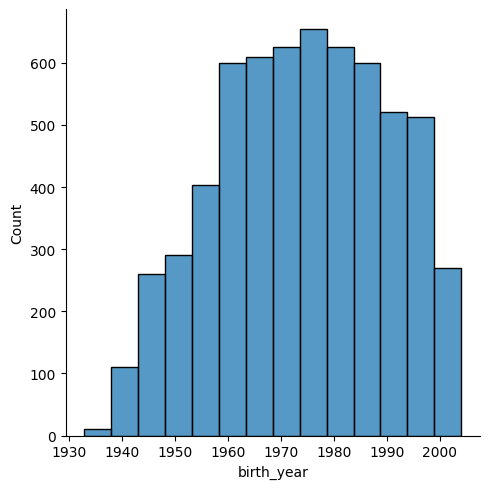

In [11]:
sns.displot(df_cyclists, x="birth_year", kind="hist", row_order="desc", bins=bins)

 
Most cyclists in the dataset appear to have been born between the 1960s and 1990s, with the peak frequency around the 1970s and 1980s.
The distribution has an almost bell shape (normal distribution), suggesting that there are more cyclists born during that period, with a gradual decrease in the number of younger (2000s) and older (pre-1960s) cyclists.


<Axes: xlabel='birth_year'>

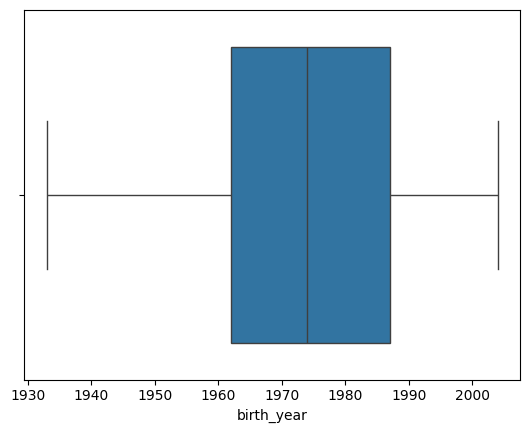

In [12]:
sns.boxplot(x='birth_year', data=df_cyclists)

The box plot confirms that most birth_year values are concentrated between the years 1960 and 1990, with the median close to 1970.
Whiskers do not show particularly extreme observations or obvious outlier values.

Questa distribuzione suggerisce che il tuo dataset contiene una popolazione principale di ciclisti più attiva o rappresentata in quel range di anni di nascita. Potrebbe indicare una raccolta dati maggiormente concentrata in quegli anni.

### Weight

In [13]:
df_cyclists['weight'].value_counts()

weight
70.000000    272
68.000000    219
65.000000    193
67.000000    177
72.000000    165
            ... 
58.631738      1
60.998714      1
65.407441      1
62.367872      1
67.556056      1
Name: count, Length: 3091, dtype: int64

In [14]:
df_cyclists['weight'].describe()

count    6094.000000
mean       68.701385
std         6.412958
min        46.199695
25%        64.133404
50%        68.762815
75%        73.000000
max        94.000000
Name: weight, dtype: float64

In [15]:
bins = sturges_bin_count(df_cyclists["weight"])
print(f"Recommended number of bins: {bins}")

Recommended number of bins: 14


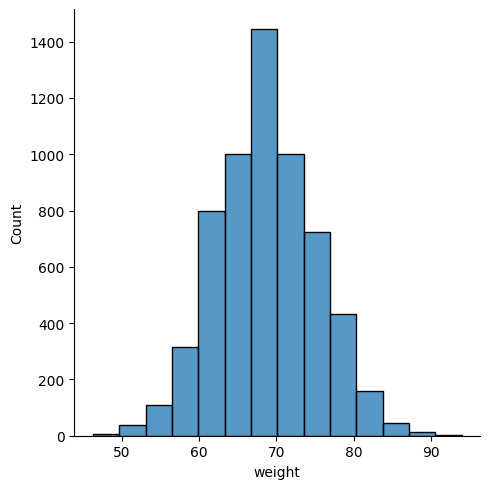

In [16]:
sns.displot(df_cyclists, x="weight", kind="hist", row_order="desc", bins=bins)

The weight distribution is approximately symmetrical, with a peak in the 65-70 kg range.
Most of the cyclists have a weight that is concentrated around this value, indicating that the average weight of the cyclists in the dataset is generally close to this range.
There is a bell-shaped distribution, suggesting a normal distribution.

<Axes: xlabel='weight'>

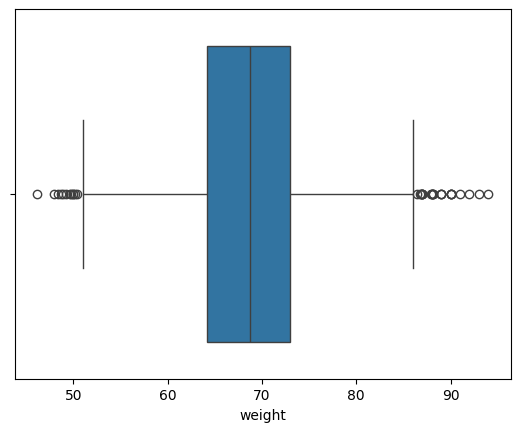

In [17]:
sns.boxplot(x='weight', data=df_cyclists)

The box plot shows that the values are distributed between approximately 65 kg and 75 kg, with a median close to 70 kg.
However, there are several outliers visible below 50 kg and above 80-90 kg.

The distribution suggests that most cyclists have a weight within a relatively narrow range around the average. The outliers present may represent individuals with particular characteristics (e.g. specialists in certain disciplines such as climbers or sprinters who tend to weigh less or more).

### Height

In [18]:
df_cyclists['height'].value_counts()

height
180.000000    275
178.000000    223
183.000000    192
181.000000    180
175.000000    169
             ... 
171.299138      1
182.353080      1
183.358766      1
181.562473      1
183.714626      1
Name: count, Length: 3015, dtype: int64

In [19]:
df_cyclists['height'].describe()

count    6094.000000
mean      179.881275
std         6.437351
min       154.000000
25%       175.561356
50%       180.000000
75%       184.000000
max       204.000000
Name: height, dtype: float64

In [20]:
bins = sturges_bin_count(df_cyclists["height"])
print(f"Recommended number of bins: {bins}")

Recommended number of bins: 14


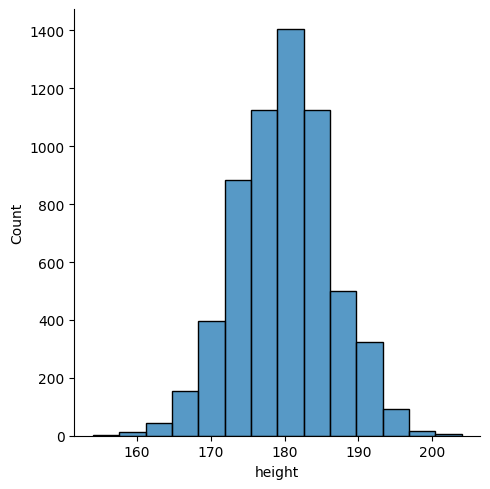

In [21]:
sns.displot(df_cyclists, x="height", kind="hist", row_order="desc", bins=bins)

The histogram shows that the distribution is centred around 180 cm.
The shape of the distribution appears symmetrical, suggesting that most of the cyclists in the dataset have a height close to the mean, which lies between 175 cm and 185 cm.
There is a bell-shaped distribution, suggesting a normal distribution.

<Axes: xlabel='height'>

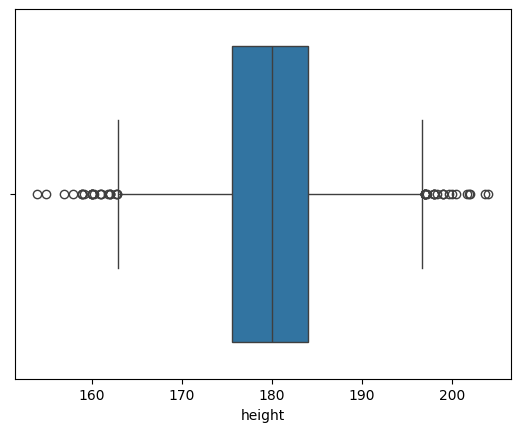

In [22]:
sns.boxplot(x='height', data=df_cyclists)

The box plot confirms that most of the heights are within the range of approximately 175 cm to 185 cm, with a median around 180 cm.
There are probable outliers in both the lower part (heights below 160 cm) and the upper part (above 200 cm), suggesting the presence of cyclists with measurements outside the central distribution.

The distribution suggests that most of the cyclists in the dataset have a height within a narrow range close to the average of 180 cm, which could be indicative of the type of cyclists represented (e.g. those specialising in certain types of races).
Outliers may represent cyclists with unique physical characteristics suitable for certain kind of races.

### Nationality

In [23]:
df_cyclists['nationality'].value_counts()

nationality
Italy                 1024
Spain                  870
Belgium                855
France                 736
Netherlands            379
                      ... 
Dominican Republic       1
Liechtenstein            1
Zimbabwe                 1
Puerto Rico              1
Hongkong                 1
Name: count, Length: 72, dtype: int64

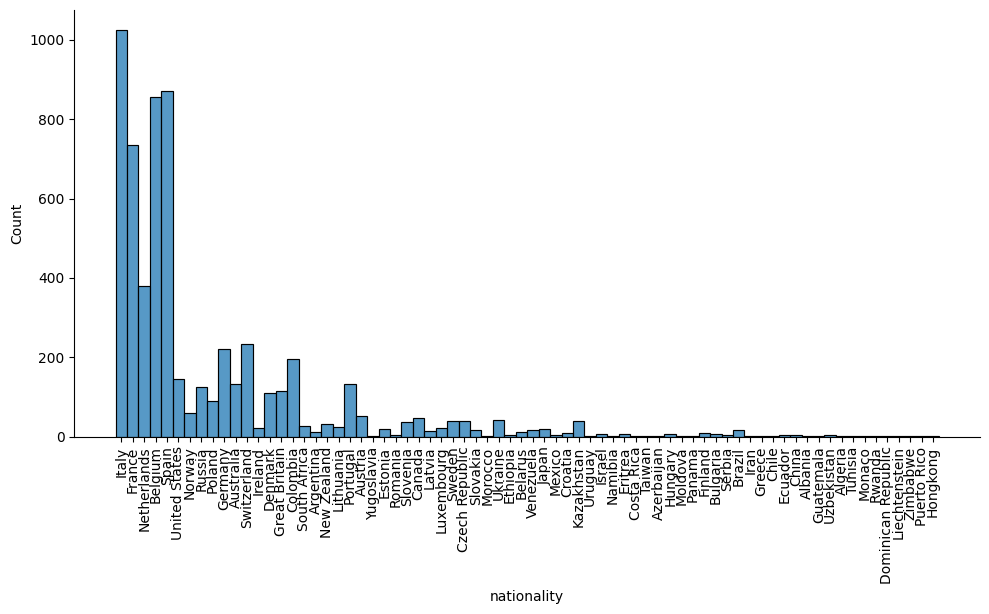

In [24]:
sns.displot(df_cyclists, x="nationality", kind="hist", row_order="desc", bins=len(df_cyclists['nationality'].unique()), aspect=2)
plt.xticks(rotation=90);

Italy is clearly the country with the largest number of cyclists represented, exceeding 1,000. This could indicate a predominance of Italian cyclists or a strong cycling tradition in Italy, which is reflected in the dataset.
Other countries with good representation include France, the Netherlands, Belgium and Spain, which is consistent with the strong interest in cycling and the historical presence of major cycling competitions in these countries.
The dataset is skewed towards a few dominant nations, with a much smaller presence of cyclists from other countries.

### Height distribution by nationality

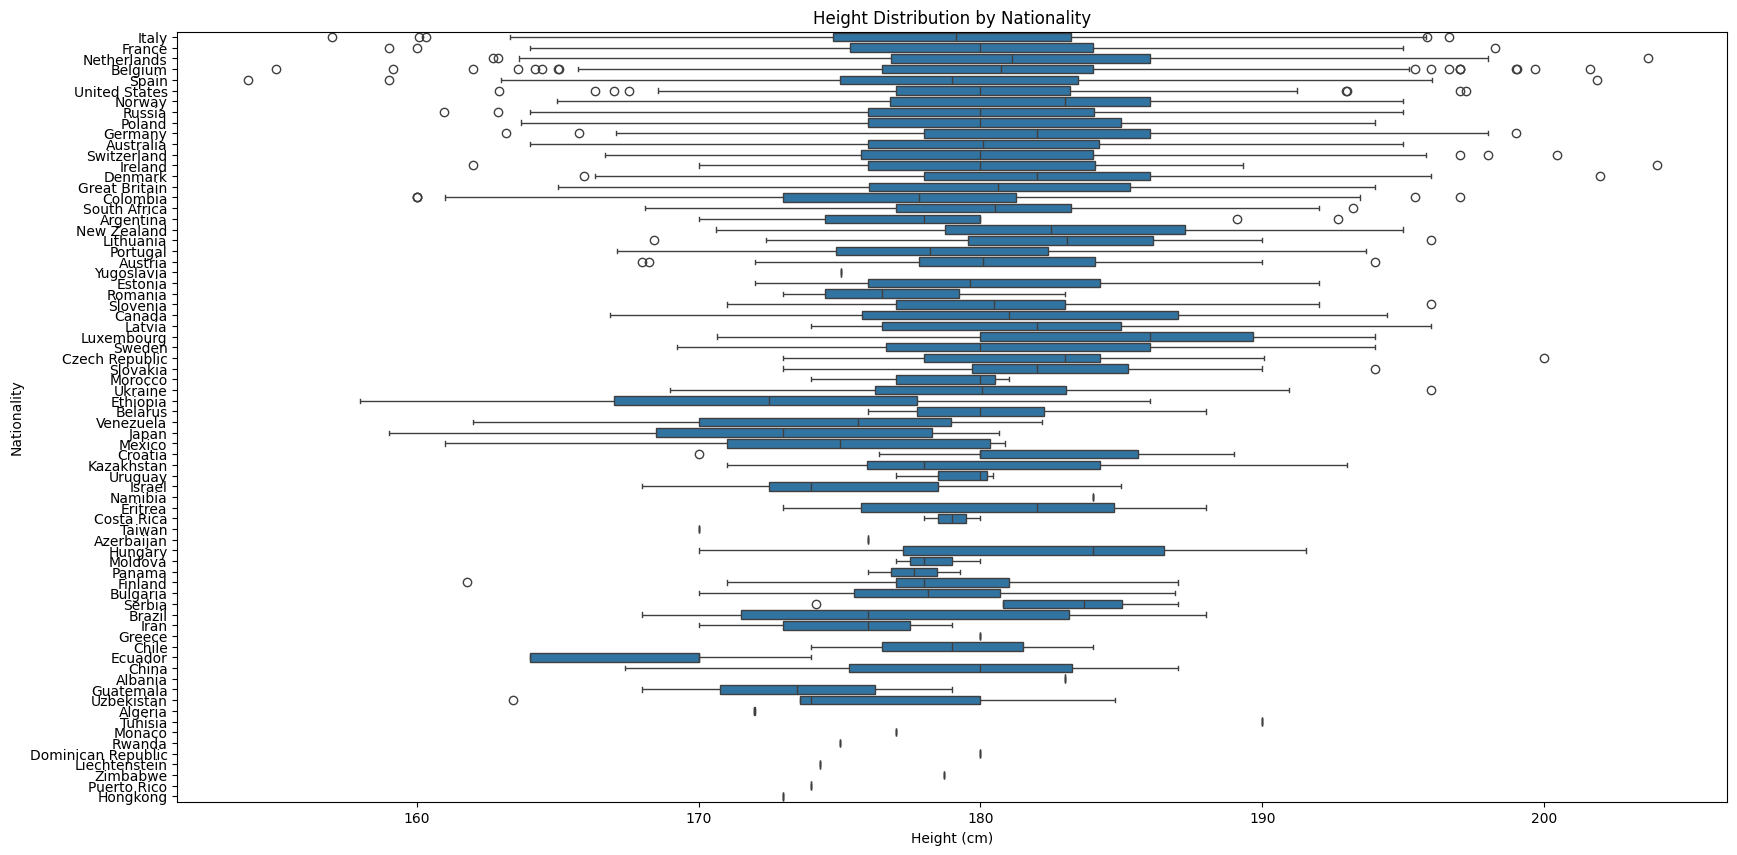

In [25]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_cyclists, x='height', y='nationality')
plt.title('Height Distribution by Nationality')
plt.xlabel('Height (cm)')
plt.ylabel('Nationality')
plt.show()

The graph shows numerous outliers that could indicate cyclists who specialise in particular disciplines. For example, taller cyclists might excel in time trials or flat terrain races. On the other hand, shorter cyclists might have a greater advantage on climbs, due to a better power-to-weight ratio.
Nationalities may differ significantly in the height distribution of their athletes. This could reflect genetic and physical differences, or it could be the result of selection strategies that favour certain physical characteristics based on the most popular cycling disciplines in a given country. For example, countries with a tradition in mountain races might focus on athletes with a lighter build, while those oriented towards track or time trial races might prefer taller and more powerful cyclists.
Some countries might have very strict selection criteria, leading to a narrower distribution of heights, while others might cultivate a variety of talents to suit different types of races.

### Weight distribution by nationality

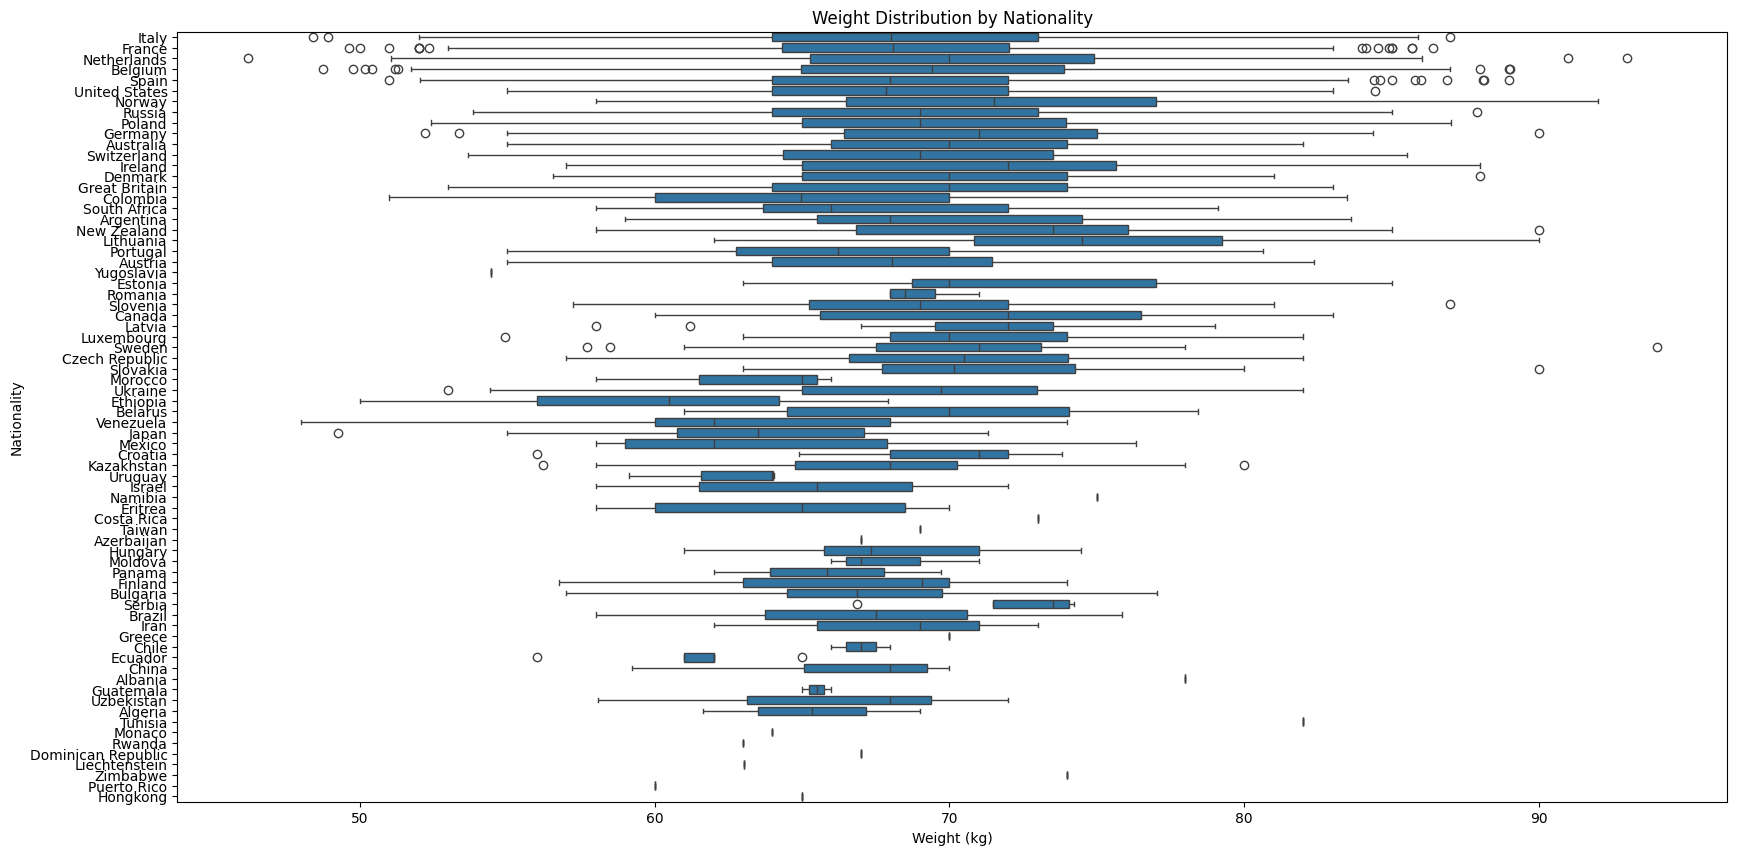

In [26]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_cyclists, x='weight', y='nationality')
plt.title('Weight Distribution by Nationality')
plt.xlabel('Weight (kg)')
plt.ylabel('Nationality')
plt.show()

Again, the presence of numerous outliers in some nationalities may indicate athletes who specialise in different cycling disciplines. For example, cyclists with much lower weights might be climbers, while those with higher weights might specialise in time trials or track races where absolute power plays a role.
Another important observation concerns the variability of some nationalities compared to others: some groups have very narrow distributions, suggesting a homogeneity in the weight selection of cyclists, perhaps reflecting a nation's specific orientation towards a particular type of competition. In contrast, other nationalities show greater variability, which could indicate a diversification of athletes in cycling disciplines or a different selection policy. All this could reflect also genetic and physical differences.
Weight distribution could also reflect socio-cultural factors. Some nationalities might have different approaches to training, nutrition or athlete selection strategies, thus influencing the observed weight distributions. Furthermore, factors such as altitude and the type of races most common in the respective countries could have an impact on the type of cyclist selected or developed.

### Height Vs. Weight (By Nationality)

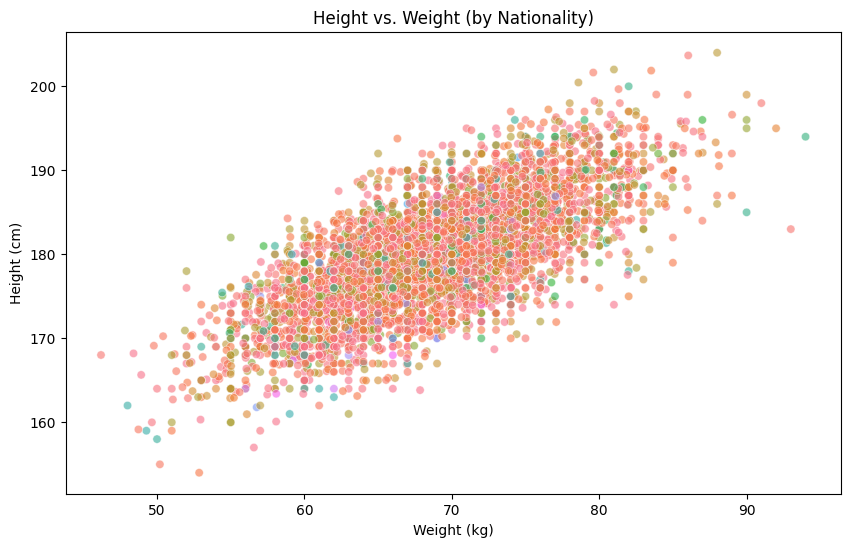

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cyclists, x='weight', y='height', hue='nationality', alpha=0.6, legend=False)
plt.title('Height vs. Weight (by Nationality)')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.show()

 
The graph shows a positive trend: as height increases, weight also tends to increase. This behaviour is consistent with physiological expectations, as taller individuals tend to weigh more.
The distribution seems rather uniform, as there are no clear distinct groupings in the graph.
The highest density of dots is found in the height range of approximately 175-185 cm and weight range of approximately 65-75 kg, which corresponds to the average statistics noted above.

### Height trends by decade

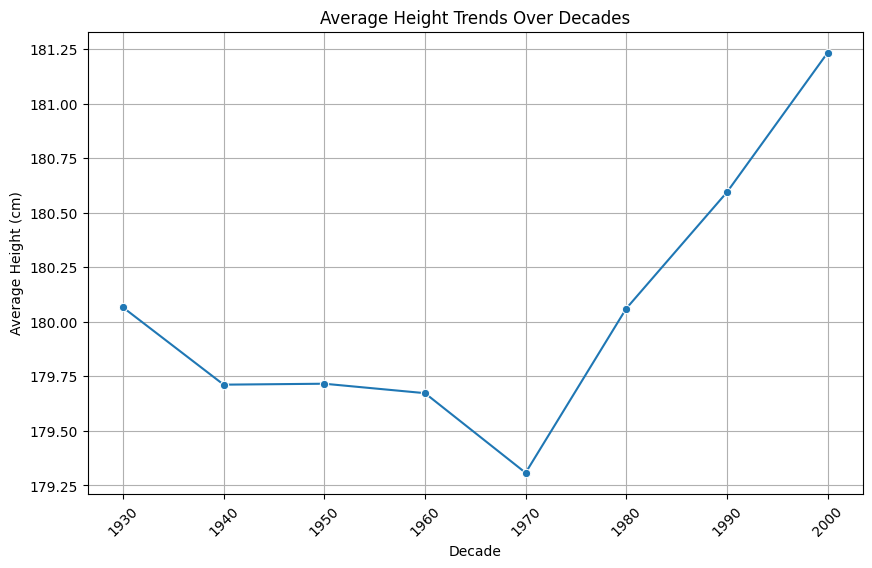

,decade,height
0,1930.0,180.065860
1,1940.0,179.711965
2,1950.0,179.716216
3,1960.0,179.672980
4,1970.0,179.308092
5,1980.0,180.060787
6,1990.0,180.593474
7,2000.0,181.232349


In [28]:
df_cyclists['decade'] = (df_cyclists['birth_year'] // 10) * 10

height_trends = df_cyclists.groupby('decade')['height'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=height_trends, x='decade', y='height', marker='o')
plt.title('Average Height Trends Over Decades')
plt.xlabel('Decade')
plt.ylabel('Average Height (cm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

height_trends

 
The graph shows a general upward trend in the average height of cyclists over the decades. This trend suggests that newer cyclists tend to be taller than cyclists of previous generations.
The increase in average height may reflect factors related to improved nutritional conditions, athletic selection and changes in sport, where different physical characteristics may have been preferred over time.
Increased height may also reflect a better selection of athletes with the right build for certain types of races or competitions.

### Weight trends by decade

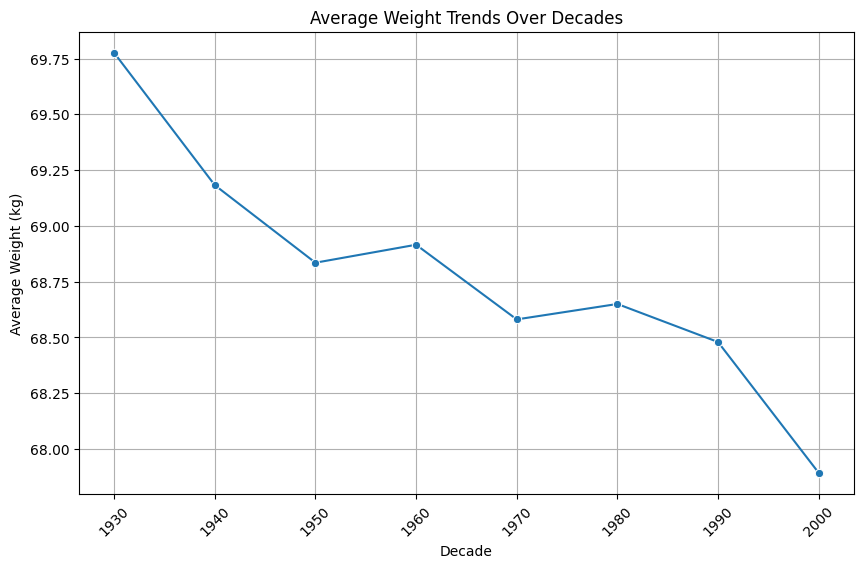

,decade,weight
0,1930.0,69.776473
1,1940.0,69.183118
2,1950.0,68.835308
3,1960.0,68.915897
4,1970.0,68.581097
5,1980.0,68.650281
6,1990.0,68.479772
7,2000.0,67.893267


In [29]:
weight_trends = df_cyclists.groupby('decade')['weight'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=weight_trends, x='decade', y='weight', marker='o')
plt.title('Average Weight Trends Over Decades')
plt.xlabel('Decade')
plt.ylabel('Average Weight (kg)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

weight_trends

The graph shows an overall decline in the average weight of cyclists over time.
The average weight decreases from the 1970s to cyclists born in 2000, suggesting a trend towards a lighter build.
This downward trend could reflect changes in racing style, athlete selection strategies and competition requirements. It could indicate a greater emphasis on lighter cyclists, who may have an advantage in some races. Increasing specialisation in different types of cycling races could favour cyclists with lighter and more aerodynamic builds.

## Races

In [30]:
df_races.head()

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta,year
0,amstel-gold-race/1970/result,Amstel Gold Race,225.0,400.0,240000.0,3941.0,2.0,372.0,1970-04-25,0,georges-pintens,24.0,False,False,False,norway-1987,0.0,1970.0
1,amstel-gold-race/1970/result,Amstel Gold Race,225.0,400.0,240000.0,3941.0,2.0,372.0,1970-04-25,1,willy-van-neste,26.0,False,False,False,norway-1987,0.0,1970.0
2,amstel-gold-race/1970/result,Amstel Gold Race,225.0,400.0,240000.0,3941.0,2.0,372.0,1970-04-25,2,andre-dierickx,23.0,False,False,False,spain-1991,22.0,1970.0
3,amstel-gold-race/1970/result,Amstel Gold Race,225.0,400.0,240000.0,3941.0,2.0,372.0,1970-04-25,3,eric-leman,24.0,False,False,False,spain-1991,11.0,1970.0
4,amstel-gold-race/1970/result,Amstel Gold Race,225.0,400.0,240000.0,3941.0,2.0,372.0,1970-04-25,4,joseph-schoeters,23.0,False,False,False,netherlands-1974,0.0,1970.0


### Preprocessing

In [31]:
total_rows = len(df_races)

filtered_df_races = df_races[df_races['_url'].str.contains(r'([^/]+)/(\d{4})/stage-(\d+)', regex=True)]

excluded_rows = total_rows - len(filtered_df_races)

print(f"Righe escluse: {excluded_rows}")
print(df_races.isnull().sum())

df_races[['race_name', 'year', 'stage']] = df_races['_url'].str.extract(r'([^/]+)/(\d{4})/stage-(.+)')

problematic_rows = df_races[df_races[['race_name', 'year', 'stage']].isna().any(axis=1)]
if not problematic_rows.empty:
    print("Rows with potential extraction issues:")
    print(problematic_rows)

df_races['year'] = pd.to_numeric(df_races['year'], errors='coerce')  # Convert 'year' to int, setting errors as NaN

print(df_races[['race_name', 'year', 'stage']].head())

C:\Users\chiar\AppData\Local\Temp\ipykernel_3848\3142064680.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df_races = df_races[df_races['_url'].str.contains(r'([^/]+)/(\d{4})/stage-(\d+)', regex=True)]


Righe escluse: 71543
_url                 0
name                 0
points               0
uci_points           0
length               0
climb_total          0
profile              0
startlist_quality    0
date                 0
position             0
cyclist              0
cyclist_age          0
is_tarmac            0
is_cobbled           0
is_gravel            0
cyclist_team         0
delta                0
year                 0
dtype: int64
Rows with potential extraction issues:
                                  _url                             name  \
0         amstel-gold-race/1970/result                 Amstel Gold Race   
1         amstel-gold-race/1970/result                 Amstel Gold Race   
2         amstel-gold-race/1970/result                 Amstel Gold Race   
3         amstel-gold-race/1970/result                 Amstel Gold Race   
4         amstel-gold-race/1970/result                 Amstel Gold Race   
...                                ...                         

In [32]:
df_races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589813 entries, 0 to 589812
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   _url               589813 non-null  object 
 1   name               589813 non-null  object 
 2   points             589813 non-null  float64
 3   uci_points         589813 non-null  float64
 4   length             589813 non-null  float64
 5   climb_total        589813 non-null  float64
 6   profile            589813 non-null  float64
 7   startlist_quality  589813 non-null  float64
 8   date               589813 non-null  object 
 9   position           589813 non-null  int64  
 10  cyclist            589813 non-null  object 
 11  cyclist_age        589813 non-null  float64
 12  is_tarmac          589813 non-null  bool   
 13  is_cobbled         589813 non-null  bool   
 14  is_gravel          589813 non-null  bool   
 15  cyclist_team       589813 non-null  object 
 16  de

### Informazioni statistiche di base

In [33]:
df_races.describe()

,points,uci_points,length,climb_total,profile,startlist_quality,position,cyclist_age,delta,year
count,589813.000000,589813.000000,589813.000000,589813.000000,589813.000000,589813.000000,589813.000000,589813.000000,589813.000000,518270.000000
mean,90.015262,90.655509,166776.292588,2320.672759,2.576739,1101.181919,74.217672,28.484552,7.569053,2006.603311
std,61.129940,125.705923,64546.251640,1382.510036,1.482537,380.594833,48.404528,3.859066,114.613528,11.223386
min,18.000000,6.000000,1000.000000,2.000000,1.000000,115.000000,0.000000,11.000000,-6906.000000,1970.000000
25%,50.000000,16.000000,152500.000000,1304.000000,1.000000,844.000000,32.000000,26.000000,0.000000,2000.000000
50%,80.000000,60.000000,178200.000000,2247.000000,2.000000,988.000000,70.000000,28.000000,0.000000,2008.000000
75%,100.000000,100.000000,203500.000000,3282.000000,4.000000,1309.000000,112.000000,31.000000,1.000000,2016.000000
max,1069.089861,800.000000,338000.000000,6974.000000,5.000000,2047.000000,209.000000,56.000000,61341.000000,2023.000000


### Checking for duplicates

In [34]:
num_duplicates = df_races.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 0


## Data Distribution - Races

In [35]:
numeric_columns = df_races.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df_races.select_dtypes(include=['object', 'category', 'bool']).columns


### Numerical columns

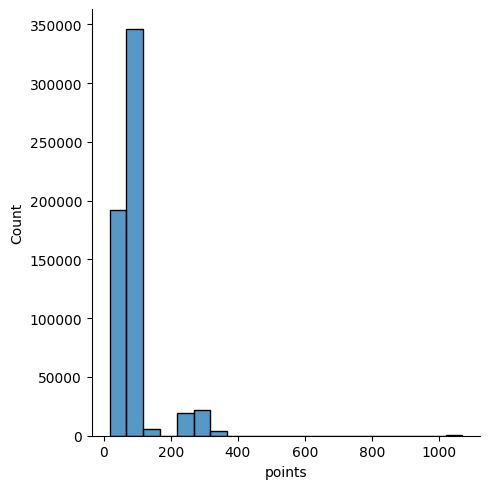

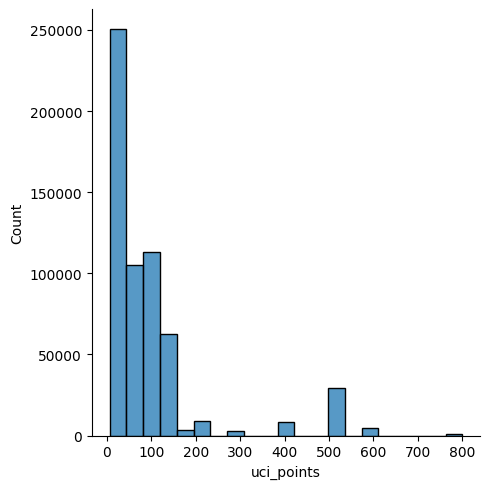

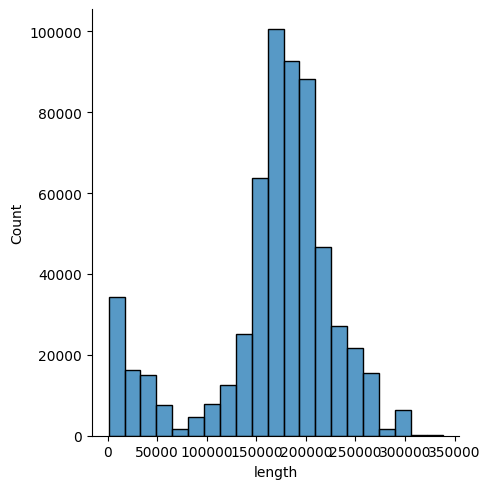

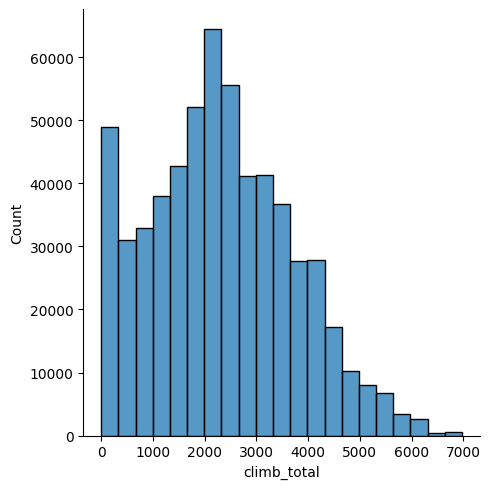

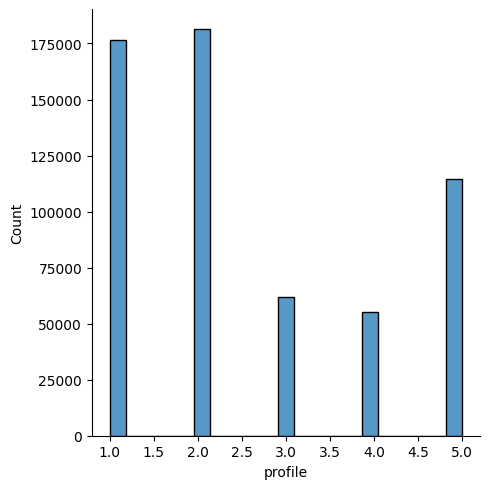

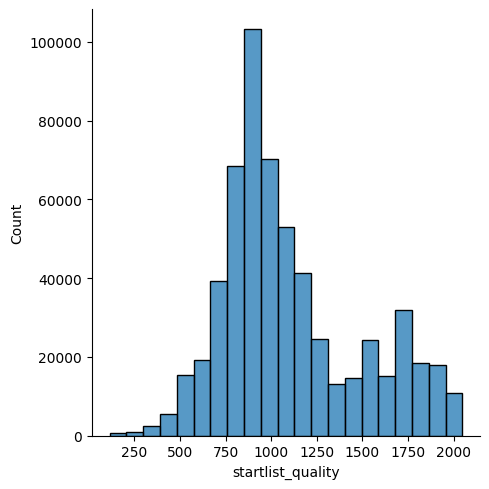

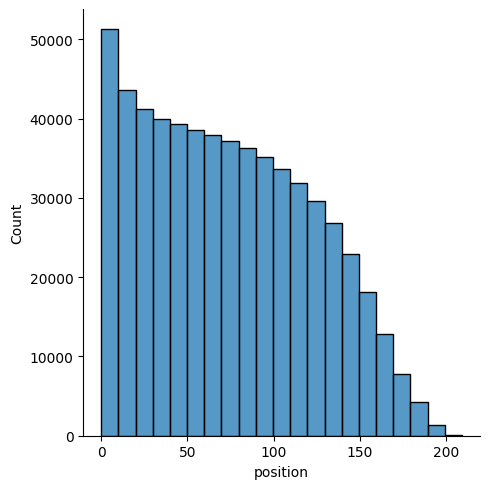

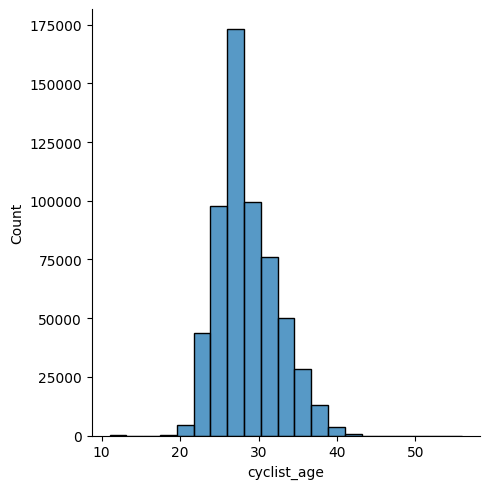

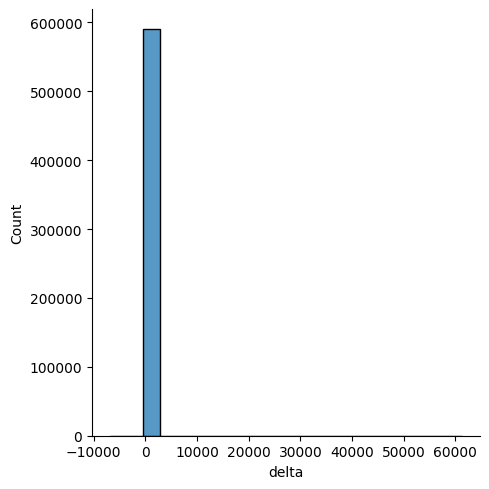

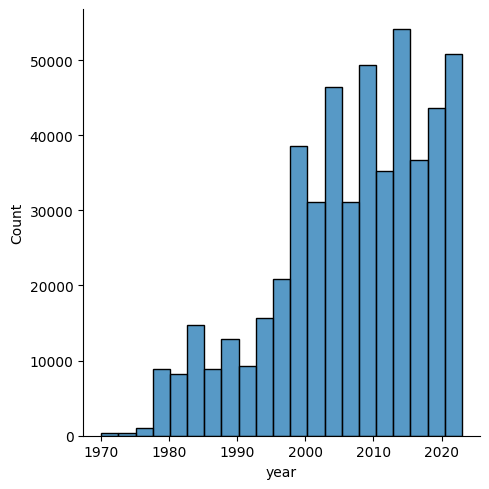

In [36]:
for col in numeric_columns:
    bins = sturges_bin_count(df_races[col])
    sns.displot(df_races, x=col, kind="hist", row_order="desc", bins=bins)

 
- points: The distribution is very unbalanced, with most of the data concentrated in a low range (close to 0). This suggests that most rides have cyclists earning a relatively low number of points. Only a very small number of rides have cyclists with significantly higher scores.

- uci_points: The distribution is similar to that of the previous points, with most values concentrated at a low level (close to 0), showing that many cyclists or events earn few UCI points. There is a long tail to the right, showing a small number of cases with a significantly higher UCI score than the rest. 

- lenght: The distribution shows that most rides are between 100,000 and 200,000 in length. There is a significant concentration of values in this range, while very short (close to 0) and extremely long runs are less common. The distribution has a central peak and has a tail towards the far right, which includes the very long length runs. 

- climb_total: The distribution has a peak around 2,000-3,000 metres, indicating that most of the rides have a total climb height difference in this range. The distribution is asymmetrical to the right, with a tail extending towards higher values of total climb. There are therefore rides with significantly longer climbs, but these are less common. 

- profile: The distribution shows that categories 1.0 and 2.0 are the most common in the dataset, followed by category 5.0. Categories 3.0 and 4.0 have a lower presence.

- startlist_quality: The distribution is mainly concentrated around the value of 1000, suggesting that most of the races have a startlist quality close to this value. The distribution has an almost normal shape, with a pronounced peak around 1000 and a gradual decrease in the number of runs with higher or lower values. 

- position: The distribution gradually decreases as the position value increases. This means that there are more riders ranked in the top positions than those ranked in the highest positions (around 200). The distribution has a decreasing shape, reflecting the obvious structure of competitions: there are fewer riders who reach the top positions than those who complete the race in the later positions. 
 
- cyclist_age: The distribution has a well-defined peak around age 30, suggesting that the majority of cyclists in the dataset are in this age group. The distribution is concentrated and slightly skewed to the right, with a tail extending towards the older ages. This reflects a minority of cyclists with higher ages, while younger ages are less common than the peak. The average age of the cyclists in the dataset appears to be concentrated in the 25-35 age range, which may represent the peak physical performance period for a cyclist.

- delta: The histogram shows that most values are concentrated near 0, with an extremely high density around this area and a very long tail to the right. The distribution shows a significant number of values close to 0 and a very small number of coases with larger delta values. 

- year: The histogram shows a gradual increase in the number of observations over the years, with a more recent peak starting in 2010. This suggests that the dataset has a greater concentration of data from more recent years. The distribution shows a growth in the number of events or data recorded since the 1990s, with a considerable increase after 2000. 

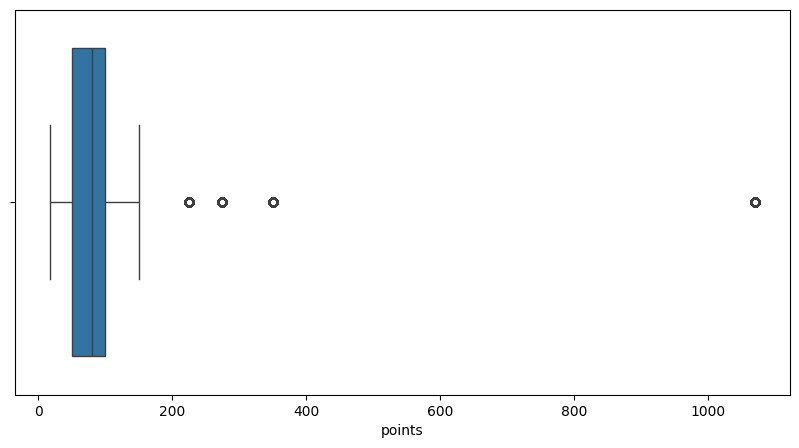

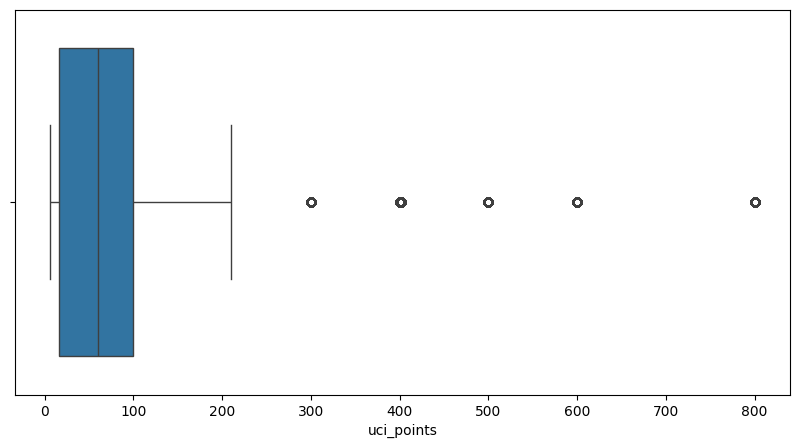

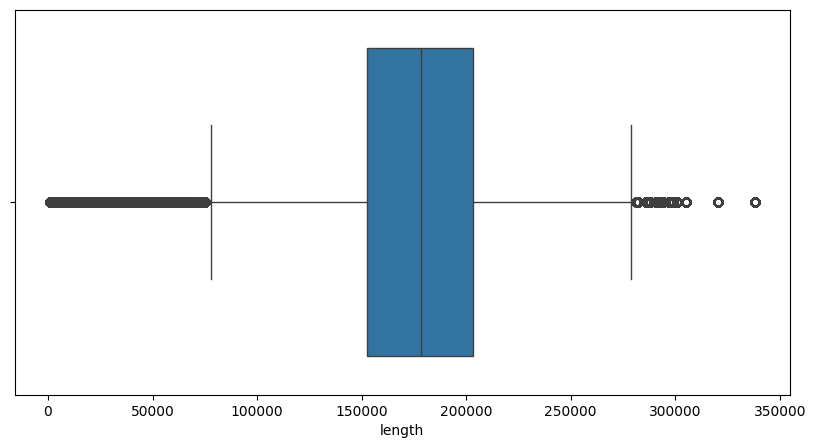

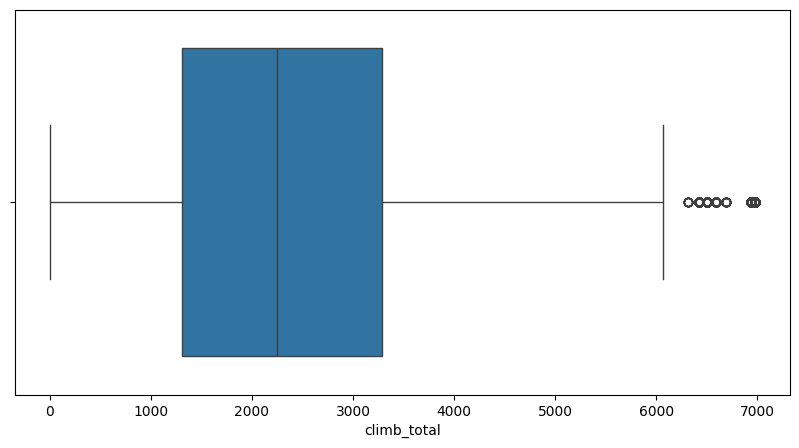

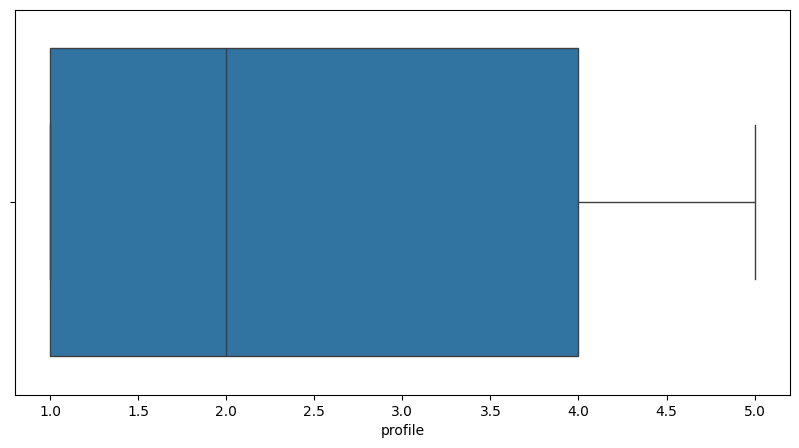

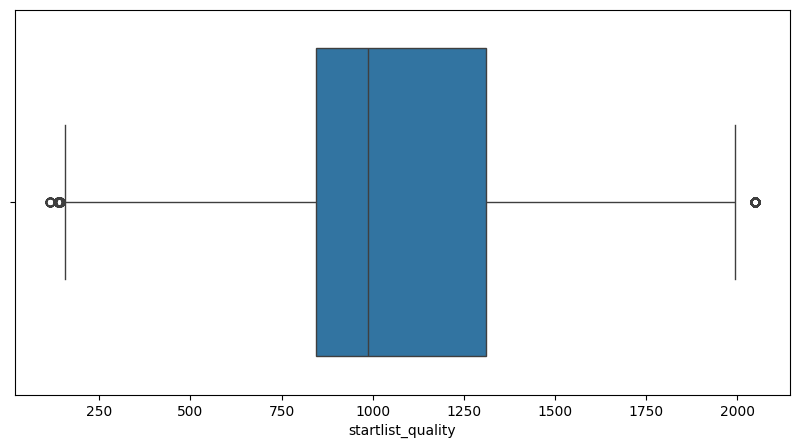

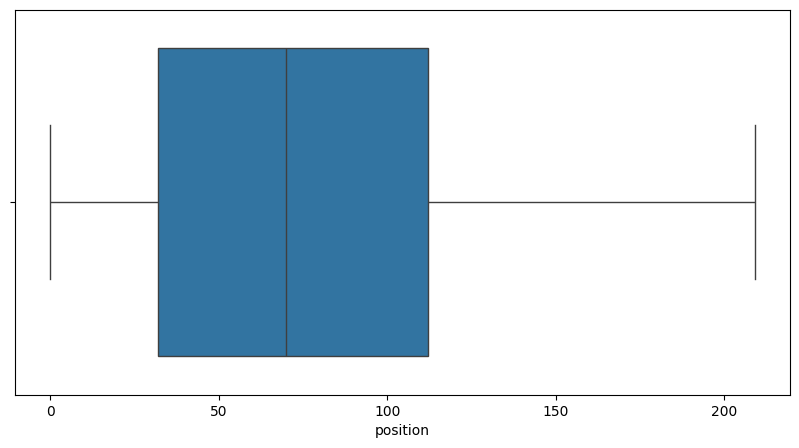

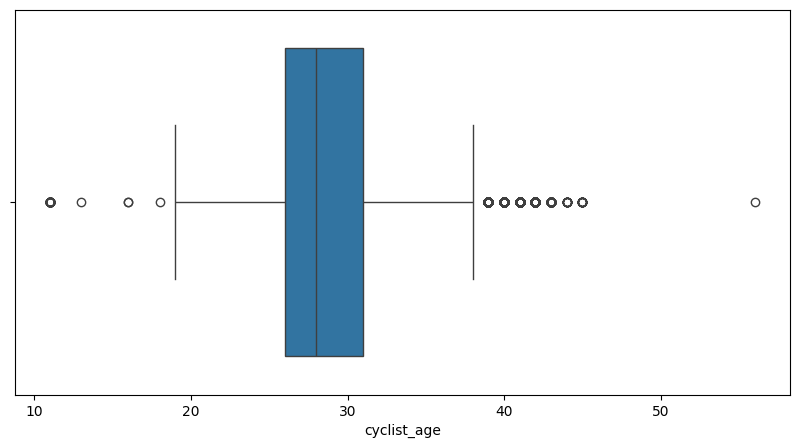

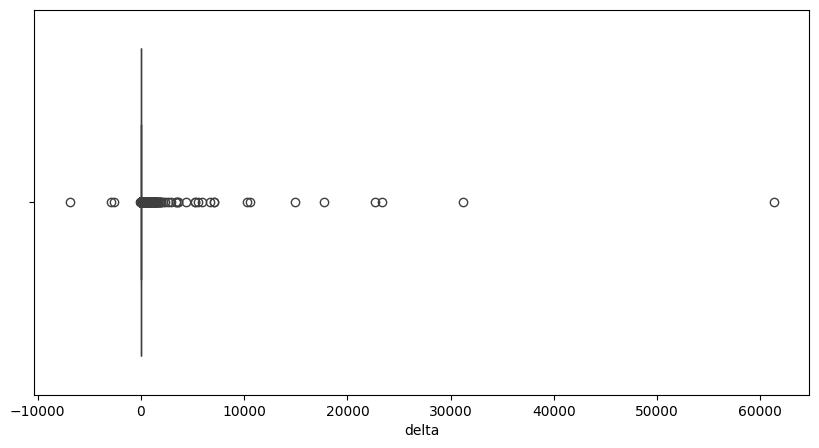

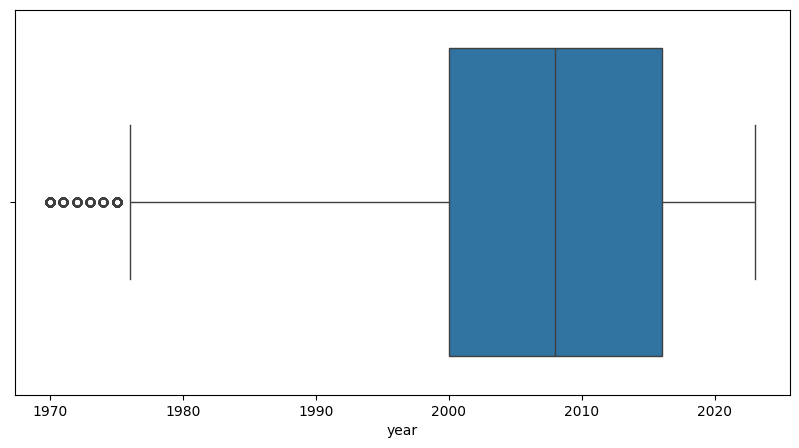

In [37]:
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_races, x=col)
    plt.xlabel(col)
    plt.show()

 
- points: The distribution of points suggests that a few races or riders stand out exceptionally well with very high scores, while most remain in a more modest range. This type of distribution could reflect the competitive nature of some races or events where only the winners or top performers score a significant amount of points.

- uci__points: The box plot shows that most of the data is concentrated at the lower end of the range, with many values considered outliers. The distribution of uci_points suggests that only a small group of cyclists or events perform exceptionally well in terms of UCI score, while most are in much lower ranges. This could reflect the high level of competition and the fact that UCI scores are distributed in a highly selective manner, rewarding only the best.

- length: The distribution suggests that most races have a standard or average length, with some exceptionally long or short events. These unusual events could be related to specific races such as time trials, special stages or races with special rules.

 
- climb_total: The distribution is moderately concentrated, suggesting that there is a wide range of total gradients among the rides, but with a predominance of average values. The distribution suggests that most of the rides include a moderate gradient, with some rides being exceptionally challenging in terms of total gradient. Races with more extreme climbs may reflect specific races such as mountain stages in competitions such as the Tour de France or other competitions in mountainous terrain.

- profile: The predominant presence of races with 1.0 and 2.0 profiles could reflect a focus on flat or less difficult races as opposed to more challenging race profiles. 

 
- startlist_quality: The relatively normal distribution suggests that the quality of the startlist is reasonably consistent in most races, but with some exceptions. Higher quality values could indicate more prestigious events with a participation of top athletes, while lower values could represent lower level races or races with less known participants.

- position: The distribution shows a concentration in the top positions, which could reflect the competitive nature of the races and the structure of the recorded results. This type of distribution is normal for rankings where many participants compete, but only a few rank at the top.

- cyclist_age: The box plot shows that most cyclists are in the age range of about 25 to 35 years, with the median around 30 years. Whiskers extend to the limits representing the acceptable age range, while there are some outliers, both younger and older, from the main distribution. This suggests the presence of cyclists with a particularly low or high age compared to the majority. Points beyond whiskers represent outliers, probably very young or veteran cyclists competing in certain races.

- delta:The presence of many outliers suggests a strong variability in delta values, with some cases deviating significantly from the main distribution. The highly concentrated distribution around 0 could indicate that most observations have a very small delta value, while some outliers have much higher values, representing the tail end of the distribution.

 
- year: The box plot shows that the majority of the data is concentrated in the range between 2000 and 2020, with the interquartile range extending from the mid-2000s to 2020. The median is close to 2010. Whiskers extend towards 1970, indicating that there are data collected since that period. Visible outliers represent years prior to 1980. The increase in the concentration of data in more recent years may reflect a greater availability of collected data or a growth in interest and monitoring of the specific phenomenon that the dataset represents.

### Non numerical columns (only the most important ones)

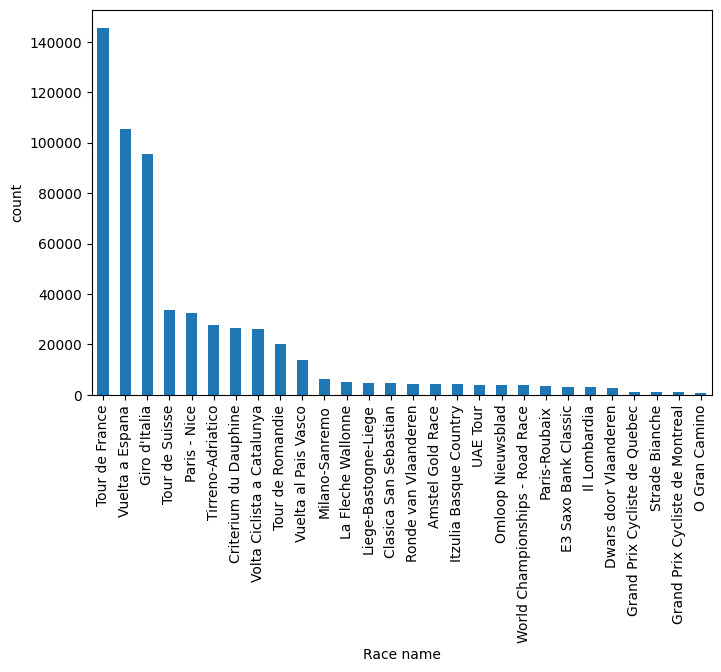

In [38]:
frequences = df_races['name'].value_counts()

plt.figure(figsize=(8, 5))
frequences.plot(kind='bar')
plt.xlabel('Race name')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

 
The graph shows that some races, such as the ‘Tour de France’, ‘Giro d'Italia’, and ‘Vuelta a España’, have a significantly higher frequency than the others.
This is consistent with the historical importance and popularity of these competitions globally: after the major events, the frequency decreases rapidly, with a long tail of races occurring at a much lower frequency.
The distribution is strongly unbalanced.

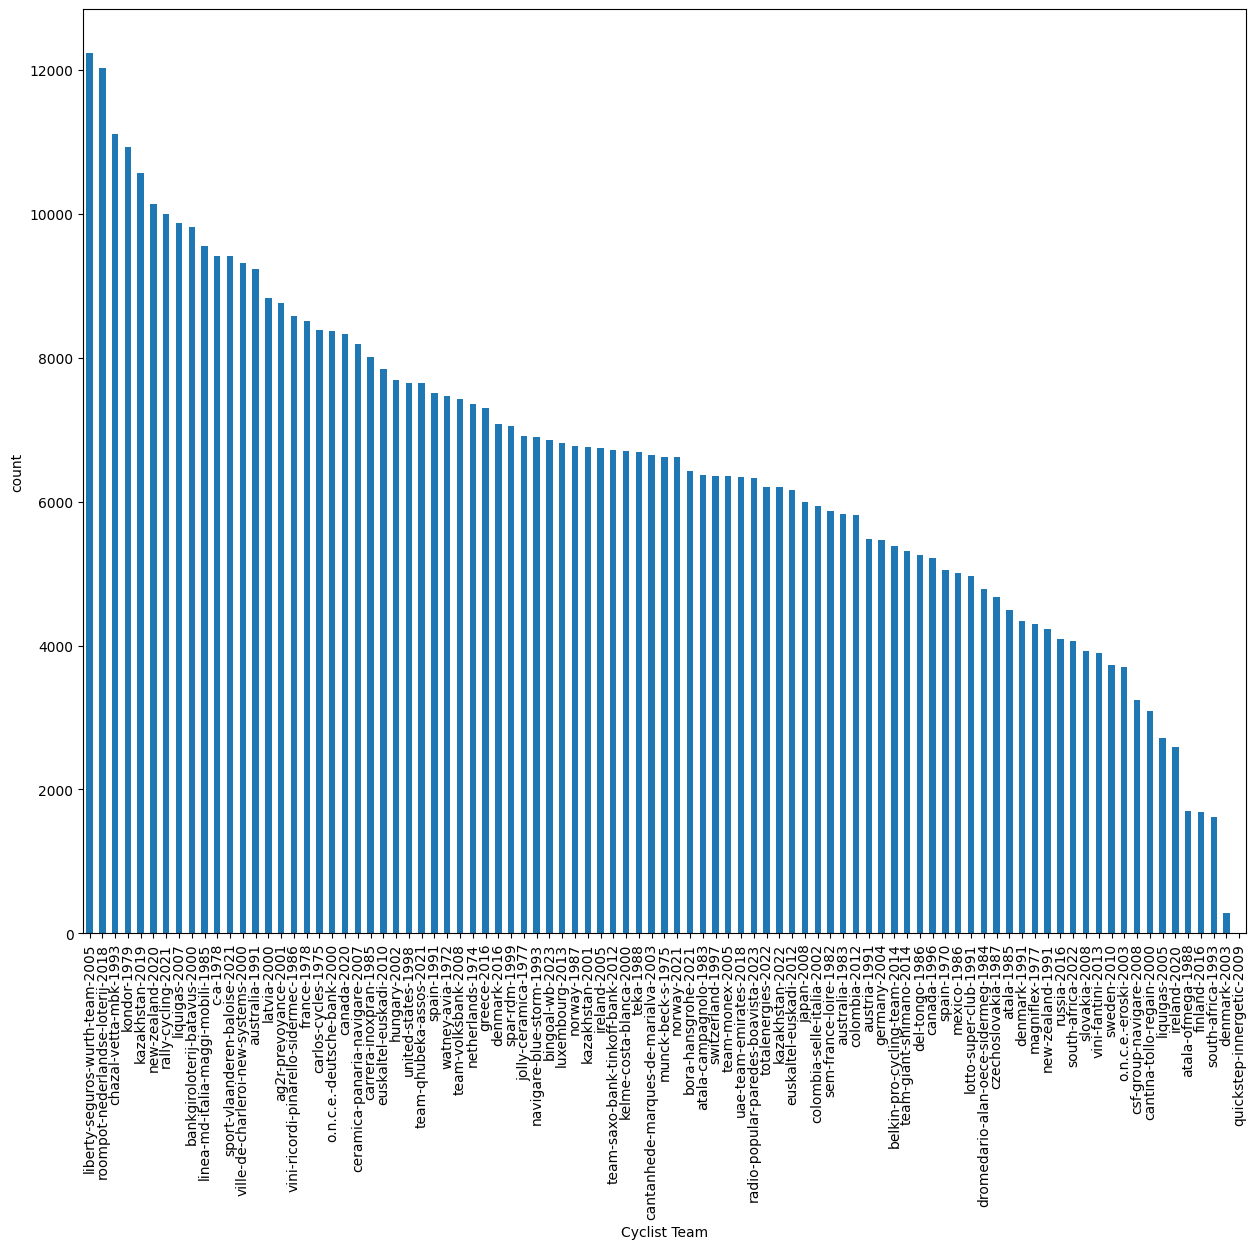

In [39]:
frequences = df_races['cyclist_team'].value_counts()

plt.figure(figsize=(15, 12))
frequences.plot(kind='bar')
plt.xlabel('Cyclist Team')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

 
The graph shows a distribution in which a few cycling teams have a very high representation compared to the rest.
The distribution decreases rapidly, with a long tail of teams having a much lower representation. This suggests that the dataset is dominated by a small number of teams with high representation or more extensive participation in races. After the teams with higher representation, the frequency gradually decreases, with a long tail of teams having a lower presence. This may reflect the sporadic or limited participation of lesser known or less successful teams compared to the major ones. The predominance of some teams may reflect their importance or success in cycling competitions and their presence in major events. The long tail of less represented teams may represent local, smaller or specialised teams that do not have the same visibility or participation as the dominant teams.




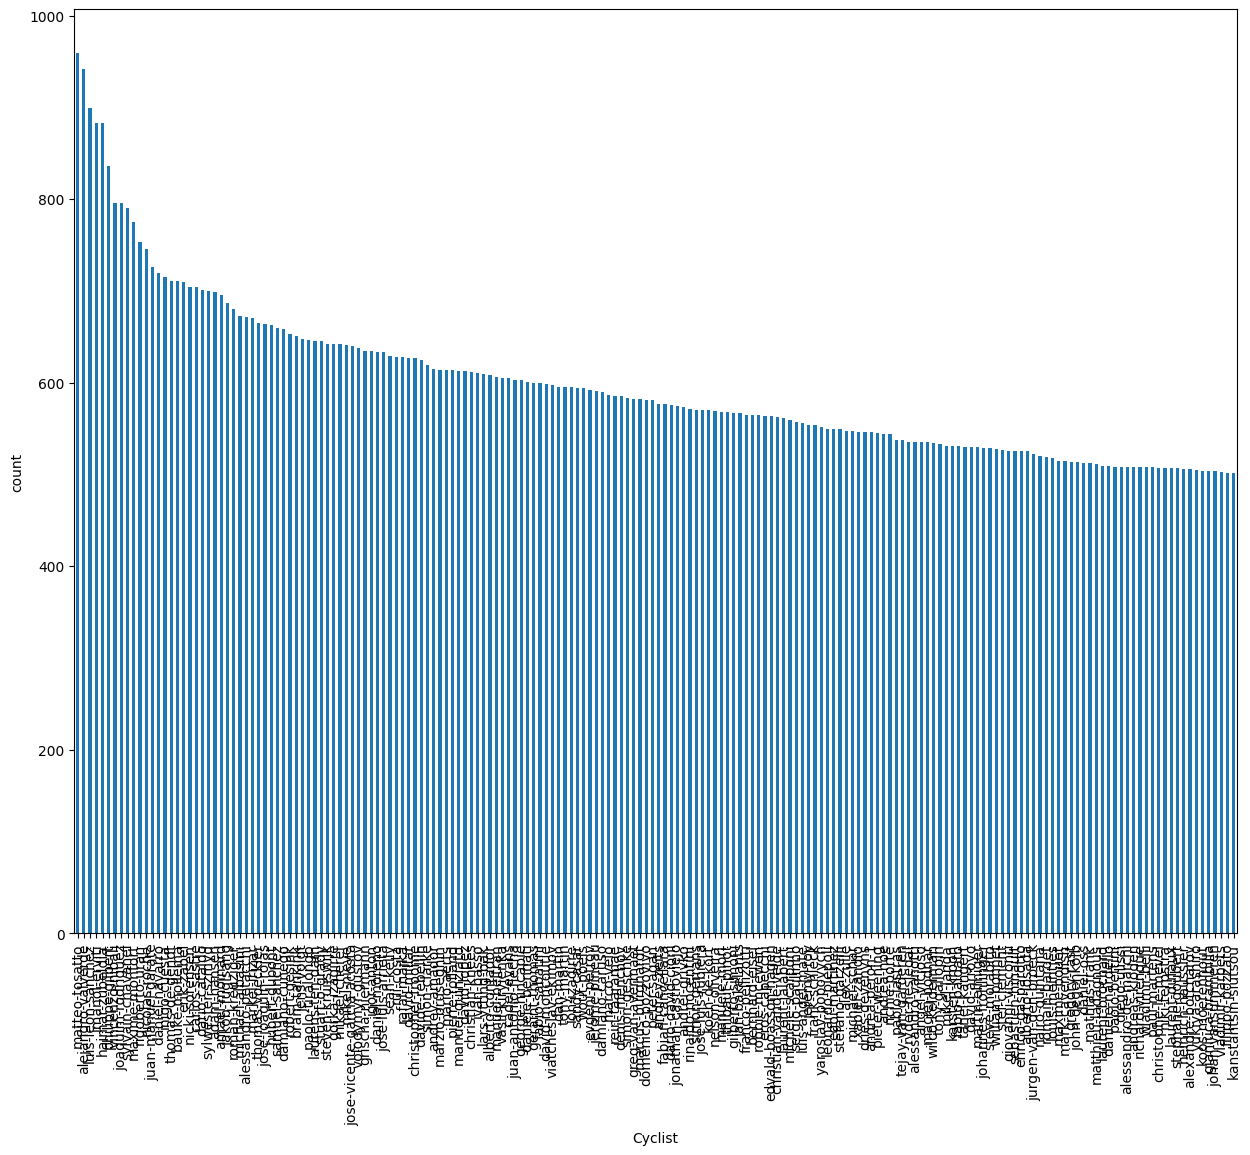

In [40]:
frequences = df_races['cyclist'].value_counts()
filtered_frequences = frequences[frequences > 500]

plt.figure(figsize=(15, 12))
filtered_frequences.plot(kind='bar')
plt.xlabel('Cyclist')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

 
The graph shows that the distribution of cyclists is dominated by a few individuals with a high frequency of appearance, close to the maximum value of 1,000 counts, while most cyclists have a much lower presence.
The distribution presents a long tail to the right. The presence of a long tail suggests that there are many cyclists who compete in a limited number of events or who are not as well represented in the dataset compared to the most frequent cyclists. The gradual decline in frequency shows a decreasing but stable participation of many cyclists who do not reach the level of appearance of the top few cyclists. The concentration of counts on the most frequently represented cyclists may reflect the presence of high-level athletes or athletes with long careers and great competition success. Cyclists with lower counts could represent new talent, occasional cyclists, or athletes with fewer appearances in key events.

### Lenght vs climb_total (by profile)

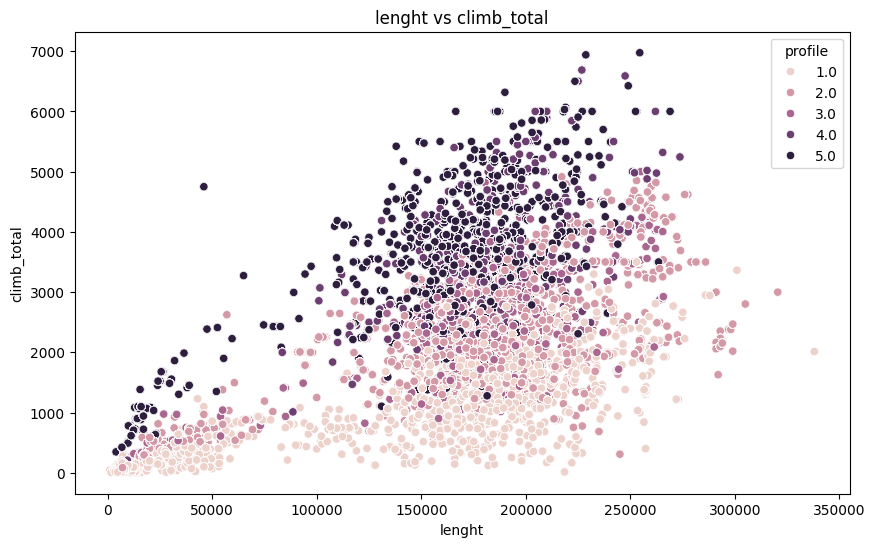

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_races, x='length', y='climb_total', hue='profile')
plt.title('lenght vs climb_total')
plt.xlabel('lenght')
plt.ylabel('climb_total')
plt.show()

 
There is a general positive relationship between the length of the run and the total metres of ascent: longer runs tend to have a greater difference in altitude.
However, the degree of variability is significant, with some long runs having a relatively low gradient. This indicates that not all long runs are necessarily challenging in terms of ascent, but many tend to be. The colours of the dots, representing the different profiles, show that rides with higher profiles (e.g. 5.0, represented in dark colours) tend to be concentrated at the top of the graph, indicating greater metres of ascent. In contrast, rides with lower profiles (1.0 or 2.0, depicted in light colours) tend to be distributed in areas with shorter lengths and less elevation gain. More challenging rides, with profiles 4.0 and 5.0, are more common in areas with high length and altitude difference, while less challenging rides (low profiles) are found in a wider range of lengths, but with generally lower altitude difference.

### Profile vs Position/Delta

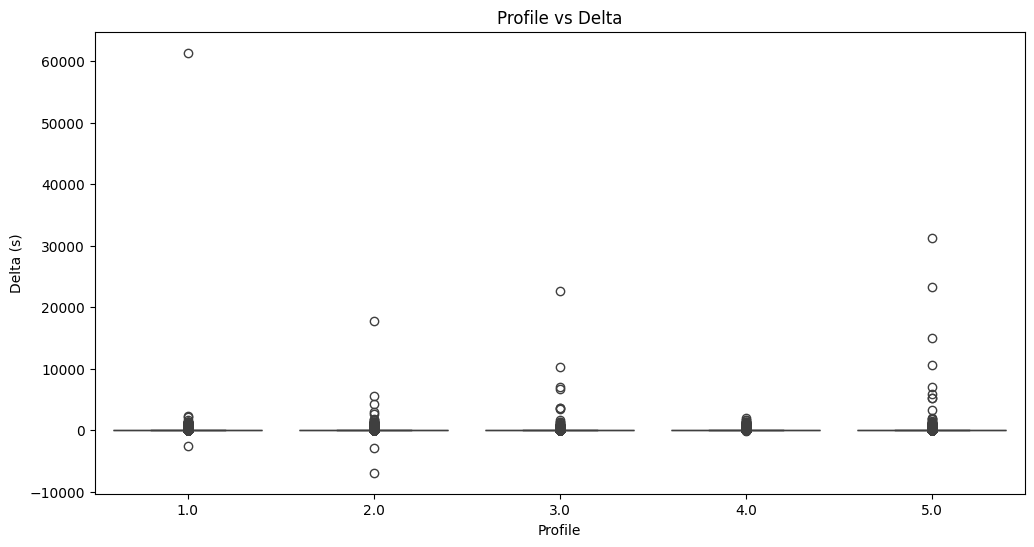

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_races, x='profile', y='delta')
plt.title('Profile vs Delta')
plt.xlabel('Profile')
plt.ylabel('Delta (s)')
plt.show()

The first box-plot shows how the distribution of the delta varies based on the race profile. There is a higher concentration of delta values near zero for all profiles, with some significant outliers, particularly for higher profiles (e.g., 4.0 and 5.0). This indicates that races with higher profiles may have greater variability in the delta values, with some particularly extreme events. Delta values tend to be more concentrated near the median for lower profiles, suggesting less variability compared to higher race profiles, which may reflect significant differences in terms of conditions or performance.

### Surfaces analysis

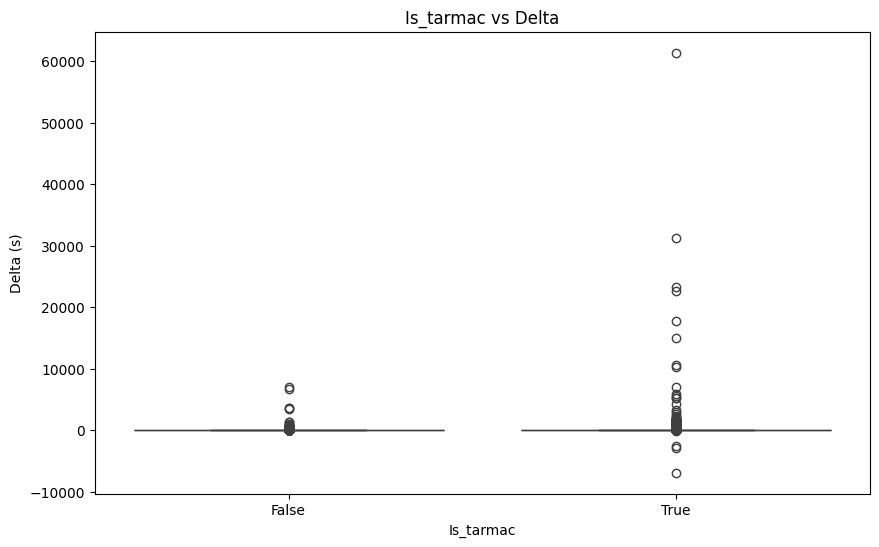

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_races, x='is_tarmac', y='delta')
plt.title('Is_tarmac vs Delta')
plt.xlabel('Is_tarmac')
plt.ylabel('Delta (s)')
plt.show()

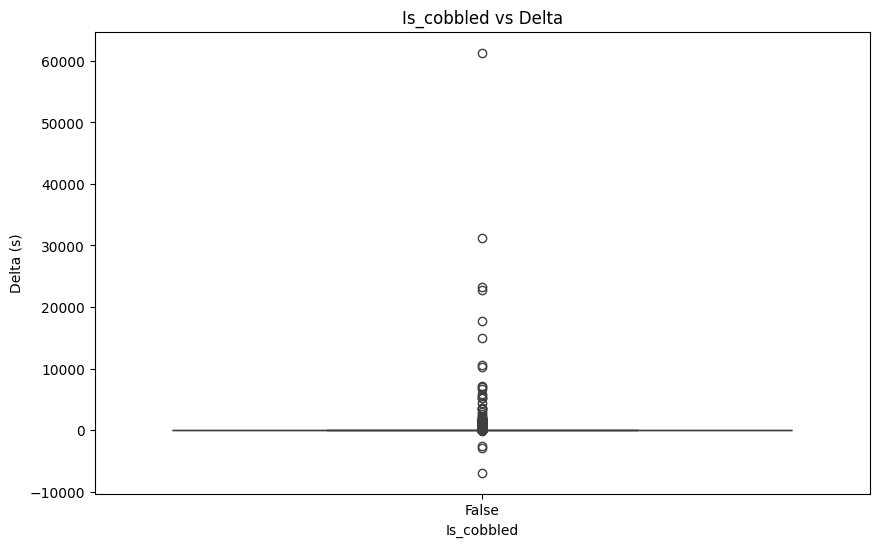

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_races, x='is_cobbled', y='delta')
plt.title('Is_cobbled vs Delta')
plt.xlabel('Is_cobbled')
plt.ylabel('Delta (s)')
plt.show()

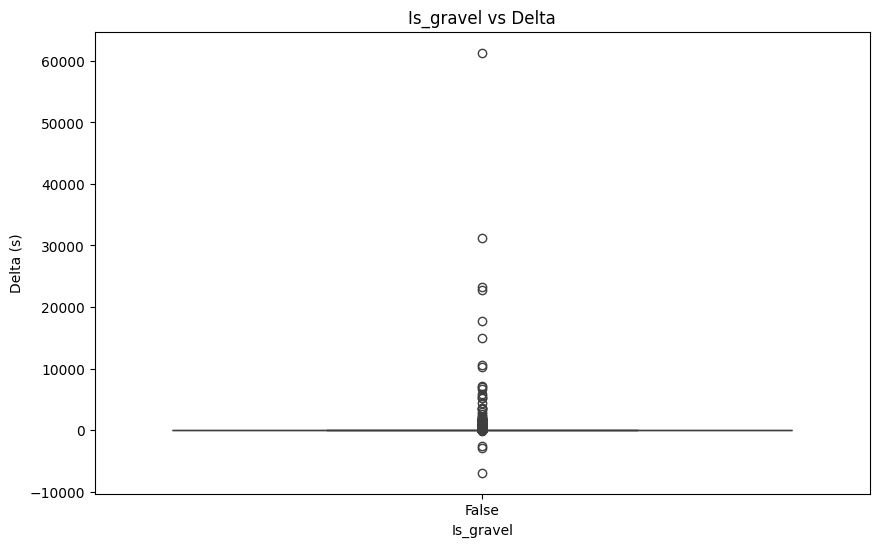

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_races, x='is_gravel', y='delta')
plt.title('Is_gravel vs Delta')
plt.xlabel('Is_gravel')
plt.ylabel('Delta (s)')
plt.show()

The delta distribution (in each graph) is heavily concentrated near zero, with numerous outliers representing very high delta values. Outliers are more evident when is_tarmac is False, indicating that more significant variations than the average may occur on surfaces other than asphalt. This suggests that unpaved conditions may lead to greater variability in performance or measured delta values.

## Combination of the two - Data Distribution

In [46]:
df_merged = pd.merge(df_races, df_cyclists, left_on='cyclist', right_on='_url', how='inner')

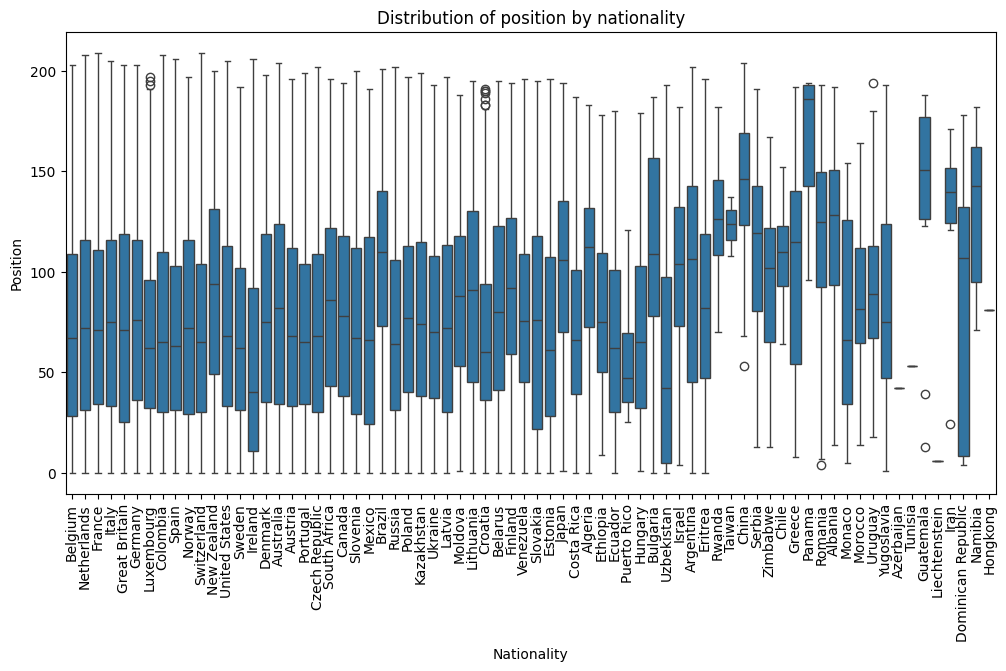

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='nationality', y='position')
plt.title('Distribution of position by nationality')
plt.xlabel('Nationality')
plt.ylabel('Position')
plt.xticks(rotation=90)
plt.show()

Some nationalities exhibit a wide distribution with many outliers, indicating greater variability in performance. Certain countries, such as the Netherlands and Belgium, show distributions with low medians, suggesting overall strong performance in results. Less represented nations tend to have box plots with wider or less defined distributions, likely due to a smaller number of cyclists or highly variable performances.

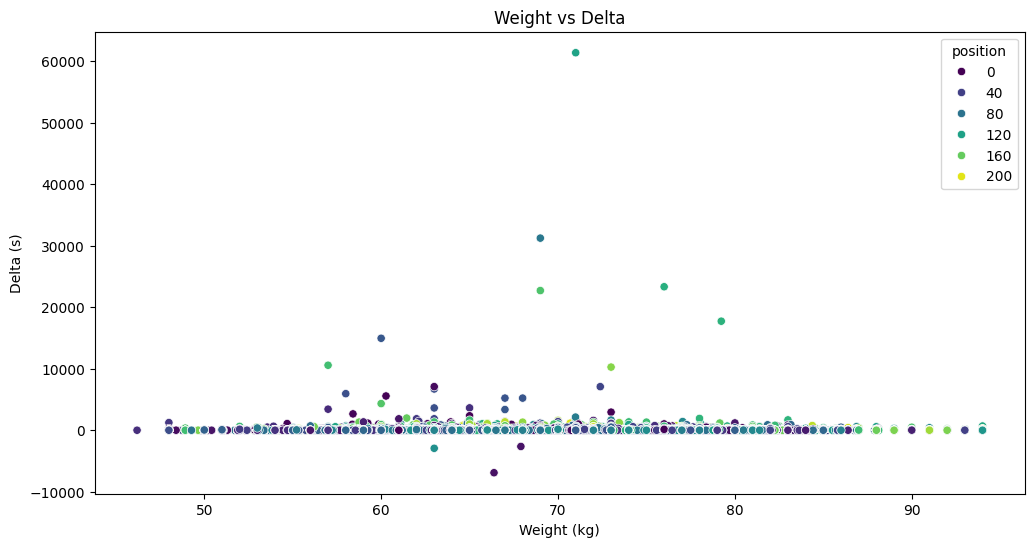

In [48]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_merged, x='weight', y='delta', hue='position', palette='viridis')
plt.title('Weight vs Delta')
plt.xlabel('Weight (kg)')
plt.ylabel('Delta (s)')
plt.show()

High delta values (both positive and negative) are rare and represented by only a few cyclists. There does not appear to be a clear or strong relationship between a cyclist's weight and their delta value. Cyclists of different weights are spread across a wide range of delta values, with a higher density observed among cyclists weighing between 60 and 80 kg. Extreme delta values (points distant from the central line) are scattered, without a noticeable concentration around any specific weight. The points are colored based on the cyclist's position, with darker colors representing better positions and lighter colors for worse ones. This indicates that delta is not strongly influenced by race position or vice versa. 

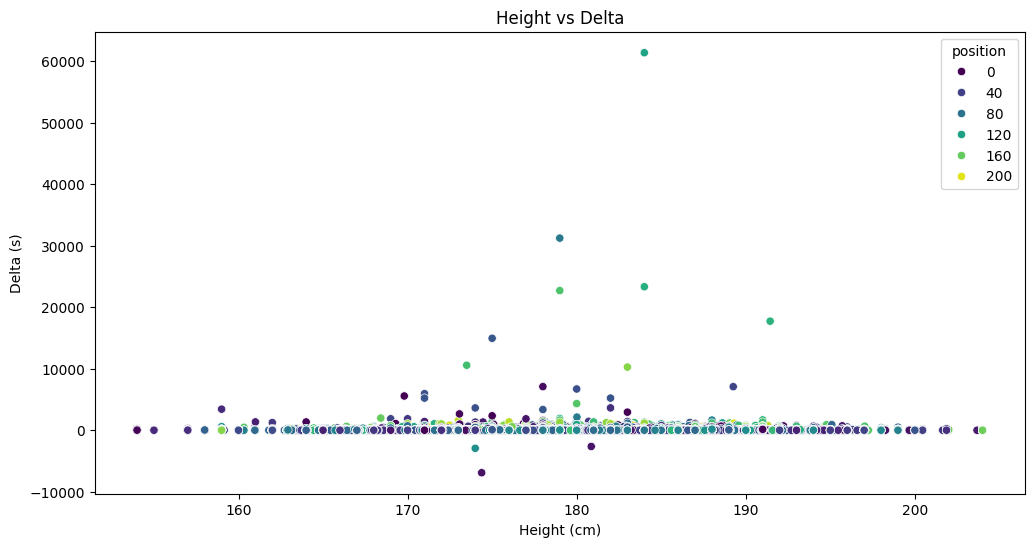

In [49]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_merged, x='height', y='delta', hue='position', palette='viridis')
plt.title('Height vs Delta')
plt.xlabel('Height (cm)')
plt.ylabel('Delta (s)')
plt.show()

High delta values (both positive and negative) are rare and represented by only a few cyclists. There does not appear to be a clear or strong relationship between a cyclist's height and their delta value. Cyclists of different heights are spread across a wide range of delta values, with a higher density observed among cyclists weighing between 170 and 180 cm. Extreme delta values (points distant from the central line) are scattered, without a noticeable concentration around any specific height. The points are colored based on the cyclist's position, with darker colors representing better positions and lighter colors for worse ones. This indicates that delta is not strongly influenced by race position or vice versa. 

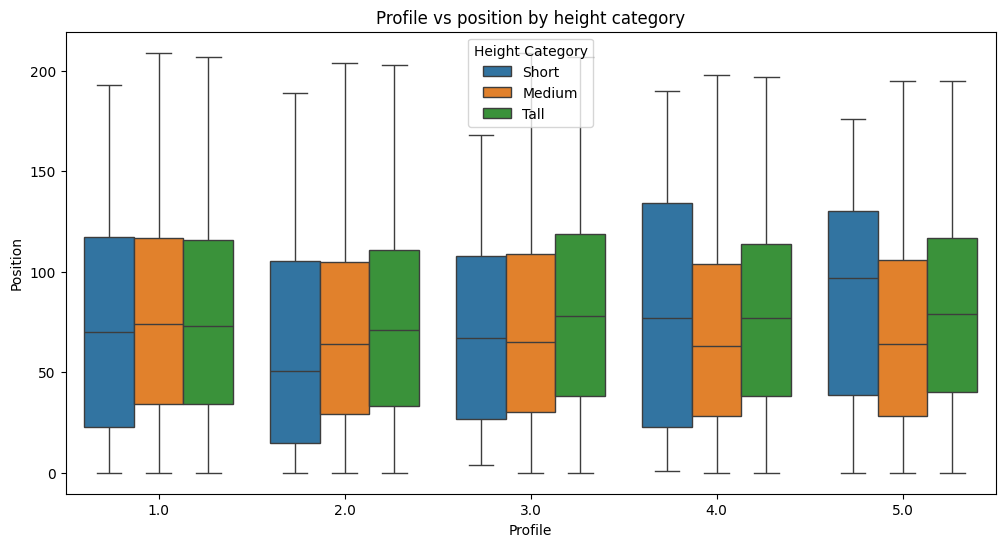

In [50]:
df_merged['height_category'] = pd.cut(df_merged['height'], bins=[140, 160, 180, 200], labels=['Short', 'Medium', 'Tall'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='profile', y='position', hue='height_category')
plt.title('Profile vs position by height category')
plt.xlabel('Profile')
plt.ylabel('Position')
plt.legend(title='Height Category')
plt.show()

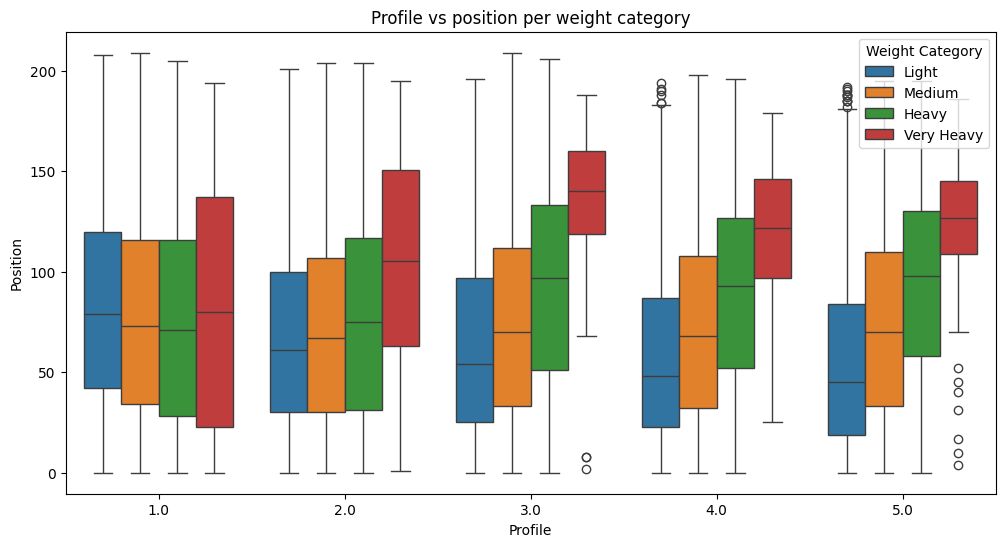

In [51]:
df_merged['weight_category'] = pd.cut(df_merged['weight'], bins=[0, 60, 75, 90, 120], labels=['Light', 'Medium', 'Heavy', 'Very Heavy'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='profile', y='position', hue='weight_category')
plt.title('Profile vs position per weight category')
plt.xlabel('Profile')
plt.ylabel('Position')
plt.legend(title='Weight Category')
plt.show()

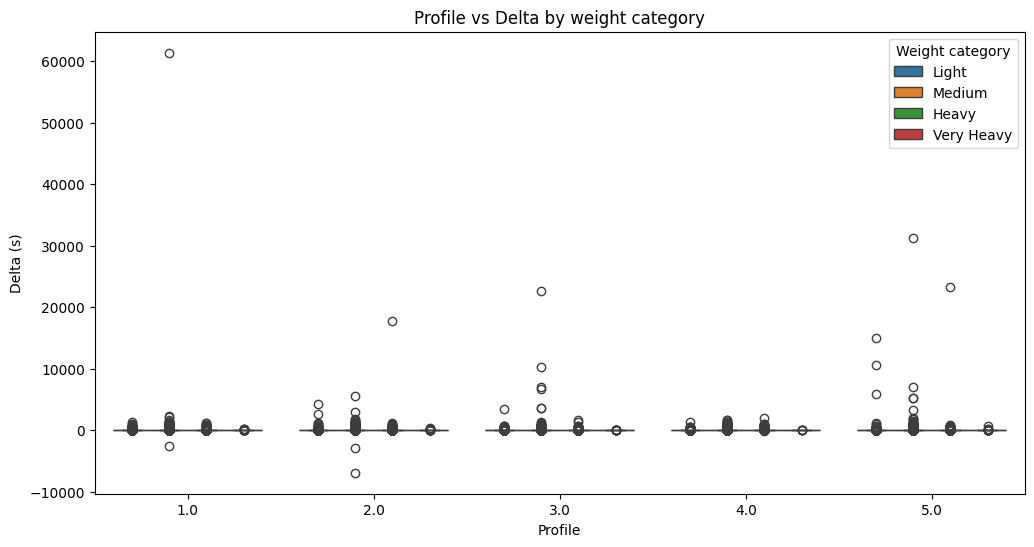

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='profile', y='delta', hue='weight_category')
plt.title('Profile vs Delta by weight category')
plt.xlabel('Profile')
plt.ylabel('Delta (s)')
plt.legend(title='Weight category')
plt.show()

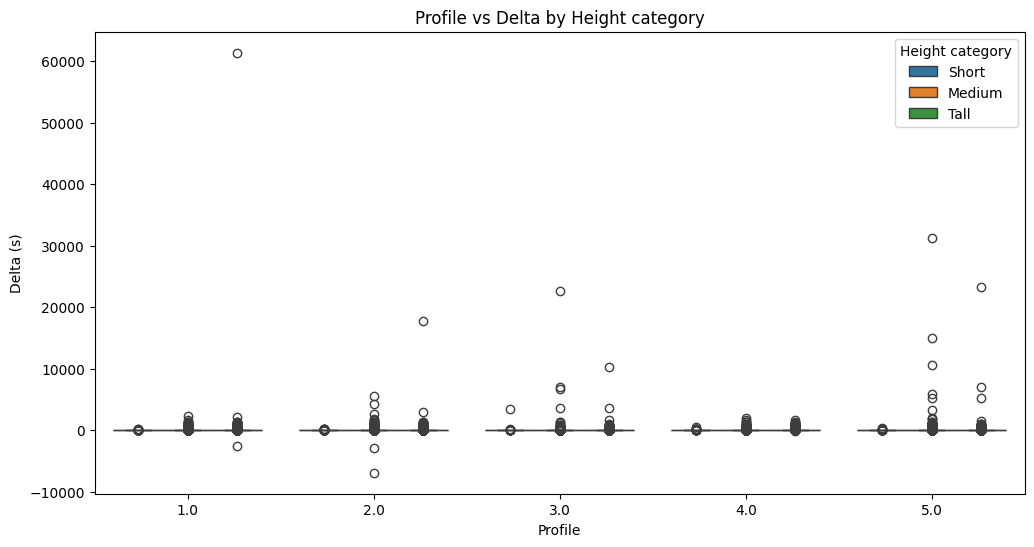

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='profile', y='delta', hue='height_category')
plt.title('Profile vs Delta by Height category')
plt.xlabel('Profile')
plt.ylabel('Delta (s)')
plt.legend(title='Height category')
plt.show()

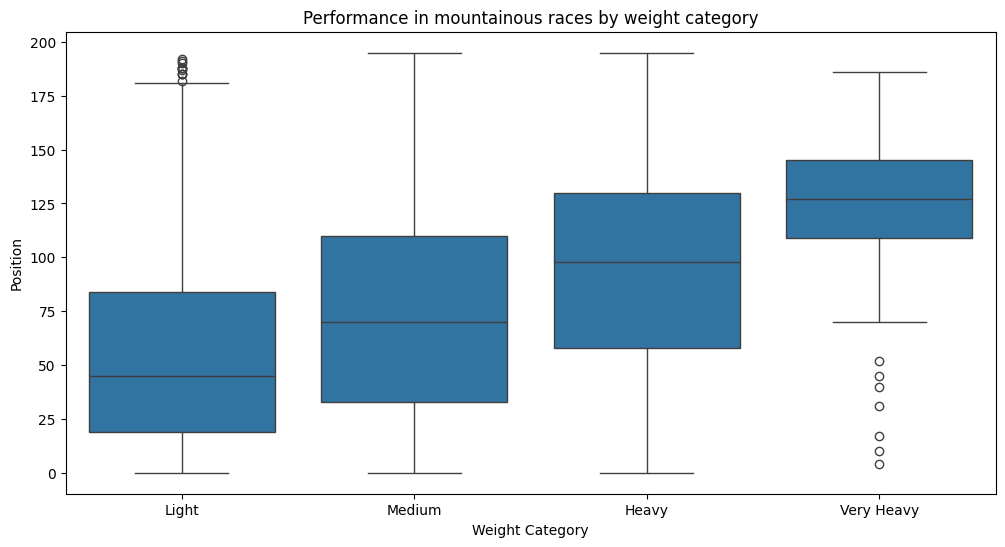

In [54]:

mountain_races = df_merged[df_merged['profile'] == 4 | 5]
plt.figure(figsize=(12, 6))
sns.boxplot(data=mountain_races, x='weight_category', y='position')
plt.title('Performance in mountainous races by weight category')
plt.xlabel('Weight Category')
plt.ylabel('Position')
plt.show()

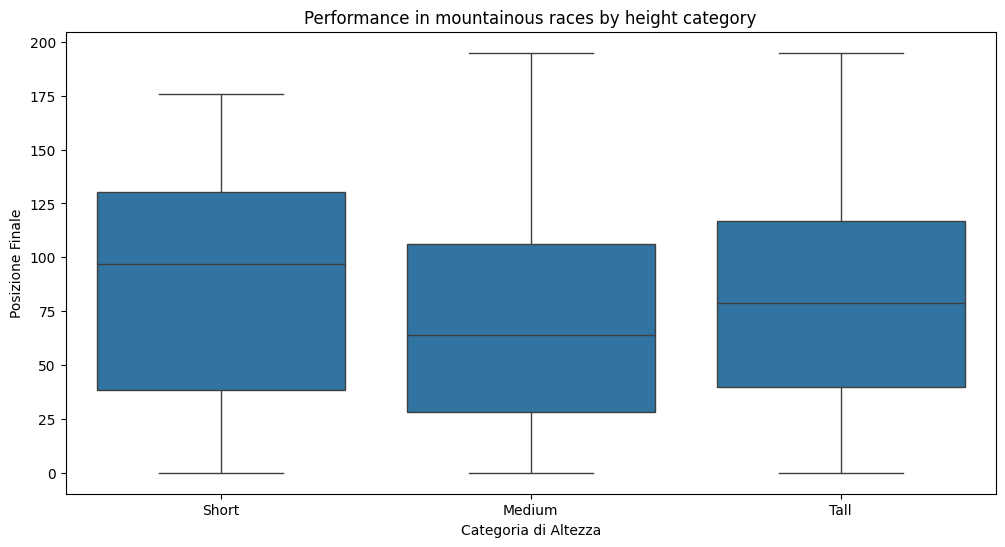

In [55]:
df_merged['height_category'] = pd.cut(df_merged['height'], bins=[140, 160, 180, 200], labels=['Short', 'Medium', 'Tall'])
mountain_races = df_merged[df_merged['profile'] ==  4 | 5]
plt.figure(figsize=(12, 6))
sns.boxplot(data=mountain_races, x='height_category', y='position')
plt.title('Performance in mountainous races by height category')
plt.xlabel('Categoria di Altezza')
plt.ylabel('Posizione Finale')
plt.show()

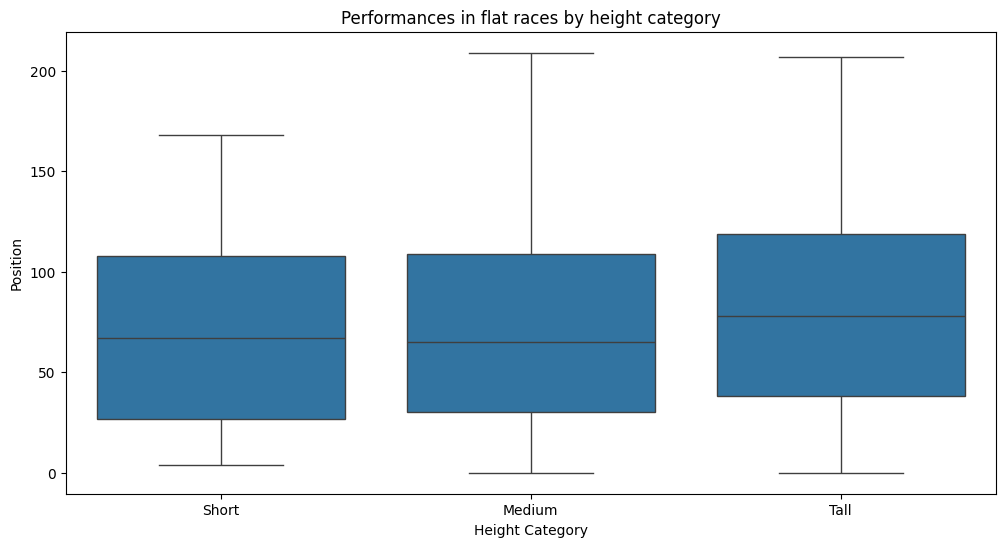

In [56]:
flat_races = df_merged[df_merged['profile'] == 1 | 2] 
plt.figure(figsize=(12, 6))
sns.boxplot(data=flat_races, x='height_category', y='position')
plt.title('Performances in flat races by height category')
plt.xlabel('Height Category')
plt.ylabel('Position')
plt.show()

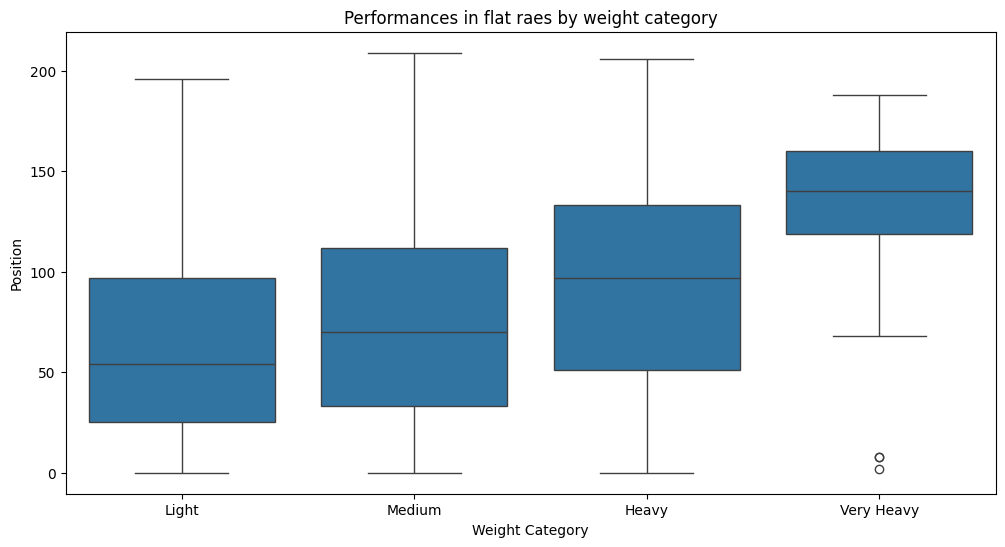

In [57]:
flat_races = df_merged[df_merged['profile'] == 1 | 2]
plt.figure(figsize=(12, 6))
sns.boxplot(data=flat_races, x='weight_category', y='position')
plt.title('Performances in flat raes by weight category')
plt.xlabel('Weight Category')
plt.ylabel('Position')
plt.show()

### To do magari dopo feature engineering

In [58]:
"""
features = df_merged[['delta', 'position', 'climb_total', 'length']].dropna()
scaled_features = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df_merged['PC1'] = principal_components[:, 0]
df_merged['PC2'] = principal_components[:, 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_merged, x='PC1', y='PC2', hue='performance_category', palette='plasma')  # Assumi che performance_category sia già definita
plt.title('PCA - Analisi delle Prestazioni Complessive')
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.legend(title='Categoria di Prestazione')
plt.show()



# PCA su caratteristiche fisiche e prestazionali
features = df_combined[['weight', 'height', 'delta', 'position', 'climb_total']].dropna()
scaled_features = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df_combined['PC1'] = principal_components[:, 0]
df_combined['PC2'] = principal_components[:, 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_combined, x='PC1', y='PC2', hue='profile', style='weight_category')
plt.title('PCA - Combinazione di Caratteristiche Fisiche e Prestazioni')
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.legend(title='Profilo della Corsa e Categoria di Peso')
plt.show()


# Supponiamo di avere prestazioni su diverse gare
features = df_combined[['race_1_delta', 'race_2_delta', 'race_3_delta']].dropna()  # Esempio con più gare
scaled_features = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df_combined['PC1'] = principal_components[:, 0]
df_combined['PC2'] = principal_components[:, 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_combined, x='PC1', y='PC2', hue='cyclist_team', palette='Set1')
plt.title('PCA - Identificazione di Ciclisti con Prestazioni Simili in Gare Diverse')
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.legend(title='Squadra del Ciclista')
plt.show()

"""

"\nfeatures = df_merged[['delta', 'position', 'climb_total', 'length']].dropna()\nscaled_features = StandardScaler().fit_transform(features)\n\npca = PCA(n_components=2)\nprincipal_components = pca.fit_transform(scaled_features)\ndf_merged['PC1'] = principal_components[:, 0]\ndf_merged['PC2'] = principal_components[:, 1]\n\nplt.figure(figsize=(12, 6))\nsns.scatterplot(data=df_merged, x='PC1', y='PC2', hue='performance_category', palette='plasma')  # Assumi che performance_category sia già definita\nplt.title('PCA - Analisi delle Prestazioni Complessive')\nplt.xlabel('Componente Principale 1')\nplt.ylabel('Componente Principale 2')\nplt.legend(title='Categoria di Prestazione')\nplt.show()\n\n\n\n# PCA su caratteristiche fisiche e prestazionali\nfeatures = df_combined[['weight', 'height', 'delta', 'position', 'climb_total']].dropna()\nscaled_features = StandardScaler().fit_transform(features)\n\npca = PCA(n_components=2)\nprincipal_components = pca.fit_transform(scaled_features)\ndf_comb

## Utility functions definition

In [59]:
from typing import Tuple, Dict, Any

def __transform_single_features(dataset: pd.DataFrame, transformation: str) -> Tuple[
    pd.DataFrame, Dict[str, Any]]:
    match transformation:
        case "standard":
            transformed_dataset = dataset.copy().select_dtypes(exclude=["object", "category", "bool", "datetime64"])
            transformations = dict()

            for feature in transformed_dataset.columns:
                transformations[feature] = StandardScaler()
                transformed_feature = transformations[feature].fit_transform(transformed_dataset[[feature]]).squeeze()
                transformed_dataset = transformed_dataset.astype({feature: transformed_feature.dtype})
                transformed_dataset.loc[:, feature] = transformed_feature
        case _:
            raise ValueError(f"Unknown transformation: {transformation}")

    return transformed_dataset, transformations


def center_and_scale(dataset: pd.DataFrame) -> Tuple[pd.DataFrame, Dict[str, Any]]:
    """Shifts data to the origin: removes mean and scales by standard deviation all numeric features. Returns a copy of the dataset."""
    return __transform_single_features(dataset, "standard")

def correlations(dataset: pd.DataFrame) -> pd.DataFrame:
    correlations_dictionary = {
        correlation_type: dataset.corr(numeric_only=True, method=correlation_type)
        for correlation_type in ("kendall", "pearson", "spearman")
    }
    for i, k in enumerate(correlations_dictionary.keys()):
        correlations_dictionary[k].loc[:, "correlation_type"] = k
    correlations_matrix = pd.concat(correlations_dictionary.values())

    return correlations_matrix

## Correlation Analysis - Cyclists

In [60]:
normalized_dataset, normalization_scalers_dataset = center_and_scale(df_cyclists)
correlations = correlations(normalized_dataset)
correlations

,birth_year,weight,height,decade,correlation_type
birth_year,1.000000,-0.026760,0.036535,0.917847,kendall
weight,-0.026760,1.000000,0.525518,-0.029048,kendall
height,0.036535,0.525518,1.000000,0.037749,kendall
decade,0.917847,-0.029048,0.037749,1.000000,kendall
birth_year,1.000000,-0.032474,0.051763,0.982969,pearson
weight,-0.032474,1.000000,0.727410,-0.033731,pearson
height,0.051763,0.727410,1.000000,0.049894,pearson
decade,0.982969,-0.033731,0.049894,1.000000,pearson
birth_year,1.000000,-0.039151,0.053795,0.984033,spearman
weight,-0.039151,1.000000,0.710217,-0.039729,spearman


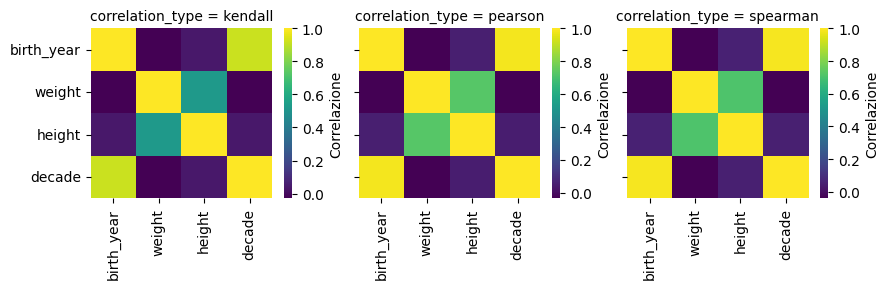

In [61]:
g = sns.FacetGrid(correlations, col="correlation_type")
g.map_dataframe(
    lambda data, color: sns.heatmap(
        data[data.columns[:-1]], 
        cmap="viridis",  
        cbar_kws={'label': 'Correlazione'} 
    )
)

plt.show()

There is a significant positive correlation between weight and height, which is expected since in general, greater height can be associated with greater weight.

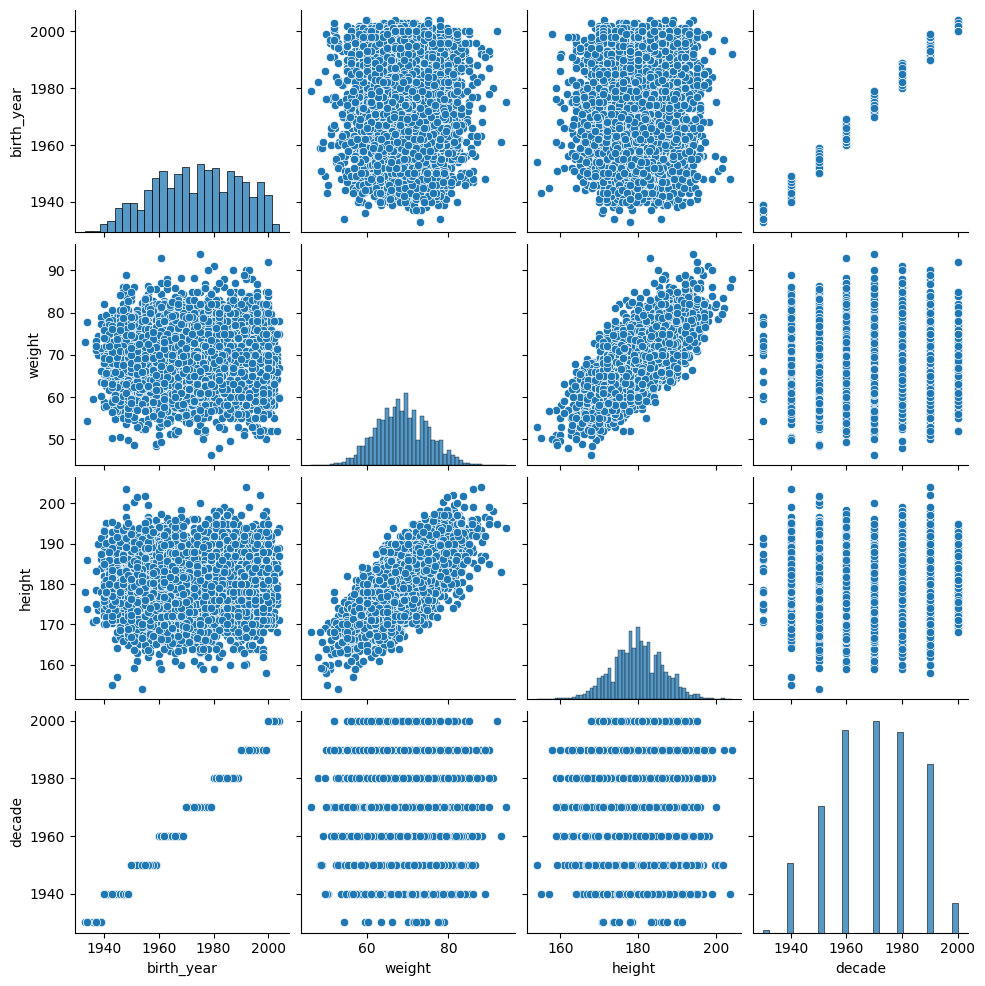

In [62]:
numerical_features = df_cyclists.select_dtypes(include=['int64', 'float64']).columns

sns.pairplot(df_cyclists[numerical_features])
plt.show()

## Correlation analysis - Races

In [63]:
df_races = pd.read_csv('df_races_no_missing.csv')

In [64]:
from typing import Tuple, Dict, Any

def __transform_single_features(dataset: pd.DataFrame, transformation: str) -> Tuple[
    pd.DataFrame, Dict[str, Any]]:
    match transformation:
        case "standard":
            transformed_dataset = dataset.copy().select_dtypes(exclude=["object", "category", "bool", "datetime64"])
            transformations = dict()

            for feature in transformed_dataset.columns:
                transformations[feature] = StandardScaler()
                transformed_feature = transformations[feature].fit_transform(transformed_dataset[[feature]]).squeeze()
                transformed_dataset = transformed_dataset.astype({feature: transformed_feature.dtype})
                transformed_dataset.loc[:, feature] = transformed_feature
        case _:
            raise ValueError(f"Unknown transformation: {transformation}")

    return transformed_dataset, transformations


def center_and_scale(dataset: pd.DataFrame) -> Tuple[pd.DataFrame, Dict[str, Any]]:
    """Shifts data to the origin: removes mean and scales by standard deviation all numeric features. Returns a copy of the dataset."""
    return __transform_single_features(dataset, "standard")

def correlations(dataset: pd.DataFrame) -> pd.DataFrame:
    correlations_dictionary = {
        correlation_type: dataset.corr(numeric_only=True, method=correlation_type)
        for correlation_type in ("kendall", "pearson", "spearman")
    }
    for i, k in enumerate(correlations_dictionary.keys()):
        correlations_dictionary[k].loc[:, "correlation_type"] = k
    correlations_matrix = pd.concat(correlations_dictionary.values())

    return correlations_matrix

In [65]:
normalized_dataset, normalization_scalers_dataset = center_and_scale(df_races)
correlation_results = correlations(normalized_dataset) 
correlation_results

,points,uci_points,length,climb_total,profile,startlist_quality,position,cyclist_age,delta,year,correlation_type
points,1.000000,0.488174,0.282409,0.086315,-0.070096,0.387298,0.011489,-0.005614,-0.019677,-0.185164,kendall
uci_points,0.488174,1.000000,0.175811,0.079781,0.005002,0.020193,-0.045697,-0.008497,-0.004969,0.026905,kendall
length,0.282409,0.175811,1.000000,0.306302,0.031366,0.064080,-0.015390,-0.002400,-0.115384,-0.062868,kendall
climb_total,0.086315,0.079781,0.306302,1.000000,0.562196,0.013807,-0.024002,0.002851,-0.028325,0.032835,kendall
profile,-0.070096,0.005002,0.031366,0.562196,1.000000,-0.064944,-0.013479,0.007214,0.076841,0.111163,kendall
startlist_quality,0.387298,0.020193,0.064080,0.013807,-0.064944,1.000000,0.097558,0.033630,-0.012443,-0.137515,kendall
position,0.011489,-0.045697,-0.015390,-0.024002,-0.013479,0.097558,1.000000,0.006438,-0.078222,0.085391,kendall
cyclist_age,-0.005614,-0.008497,-0.002400,0.002851,0.007214,0.033630,0.006438,1.000000,-0.006020,0.088461,kendall
delta,-0.019677,-0.004969,-0.115384,-0.028325,0.076841,-0.012443,-0.078222,-0.006020,1.000000,0.014645,kendall
year,-0.185164,0.026905,-0.062868,0.032835,0.111163,-0.137515,0.085391,0.088461,0.014645,1.000000,kendall


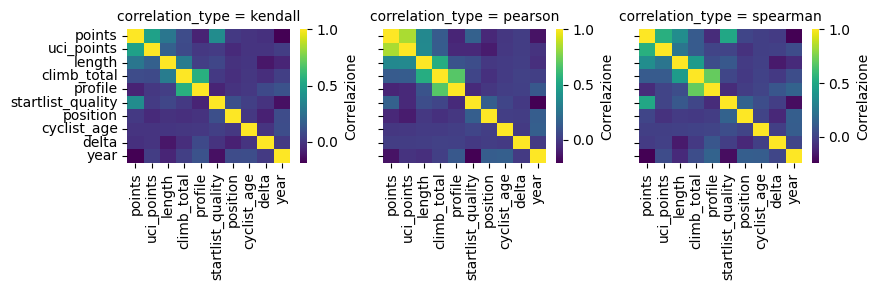

In [66]:
g = sns.FacetGrid(correlation_results, col="correlation_type")
g.map_dataframe(
    lambda data, color: sns.heatmap(
        data[data.columns[:-1]], 
        cmap="viridis",  
        cbar_kws={'label': 'Correlazione'} 
    )
)

plt.show()

There is a significant correlation between points and UCI points, as cyclists with better finishing positions tend to earn more points, and a slight correlation between points and length of the race.
In addition, points is slightly correlated with startlist_quality.
There is also the obvious correlation between profile and climb_total and between climb_total and race length.
Delta is slightly correlated with cyclist age, race profile and climb_total.

## Combination of the two - Correlation Analysis

In [67]:
df_cyclists = pd.read_csv('df_cyclists_no_missing.csv')
df_races = pd.read_csv('df_races_no_missing.csv')
df_merged = pd.merge(df_races, df_cyclists, left_on='cyclist', right_on='_url', how='inner')


In [68]:
from typing import Tuple, Dict, Any

def __transform_single_features(dataset: pd.DataFrame, transformation: str) -> Tuple[
    pd.DataFrame, Dict[str, Any]]:
    match transformation:
        case "standard":
            transformed_dataset = dataset.copy().select_dtypes(exclude=["object", "category", "bool", "datetime64"])
            transformations = dict()

            for feature in transformed_dataset.columns:
                transformations[feature] = StandardScaler()
                transformed_feature = transformations[feature].fit_transform(transformed_dataset[[feature]]).squeeze()
                transformed_dataset = transformed_dataset.astype({feature: transformed_feature.dtype})
                transformed_dataset.loc[:, feature] = transformed_feature
        case _:
            raise ValueError(f"Unknown transformation: {transformation}")

    return transformed_dataset, transformations


def center_and_scale(dataset: pd.DataFrame) -> Tuple[pd.DataFrame, Dict[str, Any]]:
    """Shifts data to the origin: removes mean and scales by standard deviation all numeric features. Returns a copy of the dataset."""
    return __transform_single_features(dataset, "standard")

def correlations(dataset: pd.DataFrame) -> pd.DataFrame:
    correlations_dictionary = {
        correlation_type: dataset.corr(numeric_only=True, method=correlation_type)
        for correlation_type in ("kendall", "pearson", "spearman")
    }
    for i, k in enumerate(correlations_dictionary.keys()):
        correlations_dictionary[k].loc[:, "correlation_type"] = k
    correlations_matrix = pd.concat(correlations_dictionary.values())

    return correlations_matrix

In [69]:
normalized_dataset, normalization_scalers_dataset = center_and_scale(df_merged)
correlations = correlations(normalized_dataset)
correlations

,points,uci_points,length,climb_total,profile,startlist_quality,position,cyclist_age,delta,year,birth_year,weight,height,correlation_type
points,1.000000,0.488174,0.282409,0.086315,-0.070096,0.387298,0.011489,-0.005614,-0.019677,-0.185164,-0.189166,0.050026,0.013769,kendall
uci_points,0.488174,1.000000,0.175811,0.079781,0.005002,0.020193,-0.045697,-0.008497,-0.004969,0.026905,0.010550,0.027247,0.021851,kendall
length,0.282409,0.175811,1.000000,0.306302,0.031366,0.064080,-0.015390,-0.002400,-0.115384,-0.062868,-0.063061,0.026672,0.008124,kendall
climb_total,0.086315,0.079781,0.306302,1.000000,0.562196,0.013807,-0.024002,0.002851,-0.028325,0.032835,0.029573,-0.012250,-0.001254,kendall
profile,-0.070096,0.005002,0.031366,0.562196,1.000000,-0.064944,-0.013479,0.007214,0.076841,0.111163,0.105821,-0.025877,-0.000656,kendall
startlist_quality,0.387298,0.020193,0.064080,0.013807,-0.064944,1.000000,0.097558,0.033630,-0.012443,-0.137515,-0.143491,0.031431,0.004976,kendall
position,0.011489,-0.045697,-0.015390,-0.024002,-0.013479,0.097558,1.000000,0.006438,-0.078222,0.085391,0.086379,0.062320,0.051078,kendall
cyclist_age,-0.005614,-0.008497,-0.002400,0.002851,0.007214,0.033630,0.006438,1.000000,-0.006020,0.088461,-0.143923,0.027137,-0.004954,kendall
delta,-0.019677,-0.004969,-0.115384,-0.028325,0.076841,-0.012443,-0.078222,-0.006020,1.000000,0.014645,0.013834,-0.019733,-0.007195,kendall
year,-0.185164,0.026905,-0.062868,0.032835,0.111163,-0.137515,0.085391,0.088461,0.014645,1.000000,0.797871,-0.040669,0.050749,kendall


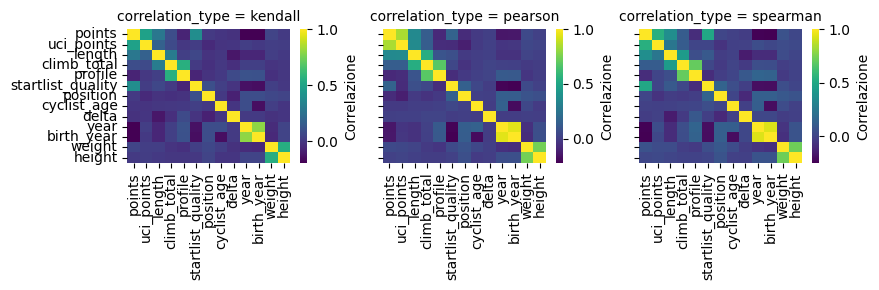

In [70]:
g = sns.FacetGrid(correlations, col="correlation_type")
g.map_dataframe(
    lambda data, color: sns.heatmap(
        data[data.columns[:-1]], 
        cmap="viridis",  
        cbar_kws={'label': 'Correlazione'} 
    )
)

plt.show()

There are no significant new correlations compared to previous ones.